#Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#from google.colab import drive
#drive.mount('/content/drive')

#Load Dataset

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/ID X Partner/Week 4/loan_data_2007_2014.csv')
df = pd.read_csv('loan_data_2007_2014.csv')
df.sample(5)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
347976      347976  20672452   22944842      35000        35000   
123251      123251   5825618    7287350      10000        10000   
210671      210671   1386701    1632462      14000        14000   
253022      253022  34713423   37406740      12000        12000   
308179      308179  27130026   29633061      27425        27425   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
347976          34925.0   60 months     16.29       856.54     D        D2   
123251           9975.0   36 months      6.62       307.04     A        A2   
210671          14000.0   36 months     14.09       479.10     B        B5   
253022          12000.0   60 months     17.14       299.14     D        D4   
308179          27425.0   60 months     14.99       652.30     C        C5   

                                  emp_title emp_length home_ownership  \
347976                   Production Manager    6 years       MORTGAGE   
123251  Claiborne County Board of Education    8 years       MORTGAGE   
210671        American Modern Insurance Co.    4 years            OWN   
253022                       Field Services    4 years           RENT   
308179           Desktop Support Technician     1 year       MORTGAGE   

        annual_inc verification_status issue_d loan_status pymnt_plan  \
347976     87000.0            Verified  Jul-14     Current          n   
123251     42000.0        Not Verified  Jul-13  Fully Paid          n   
210671     68000.0     Source Verified  Jul-12  Fully Paid          n   
253022     42000.0            Verified  Nov-14     Current          n   
308179     55000.0     Source Verified  Sep-14  Fully Paid          n   

                                                      url desc  \
347976  https://www.lendingclub.com/browse/loanDetail....  NaN   
123251  https://www.lendingclub.com/browse/loanDetail....  NaN   
210671  https://www.lendingclub.com/browse/loanDetail....  NaN   
253022  https://www.lendingclub.com/browse/loanDetail....  NaN   
308179  https://www.lendingclub.com/browse/loanDetail....  NaN   

                   purpose                    title zip_code addr_state  \
347976  debt_consolidation       Debt consolidation    750xx         TX   
123251         credit_card                     Loan    377xx         TN   
210671  debt_consolidation       debt consolidation    452xx         OH   
253022         credit_card  Credit card refinancing    461xx         IN   
308179  debt_consolidation       Debt consolidation    023xx         MA   

          dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
347976  25.10          1.0           Jul-94             0.0   
123251  22.86          3.0           Feb-97             0.0   
210671  14.84          0.0           Apr-86             1.0   
253022  31.89          0.0           Sep-03             0.0   
308179  25.97          0.0           Jan-09             0.0   

        mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
347976                    23.0                     NaN      14.0      0.0   
123251                     9.0                     NaN      20.0      0.0   
210671                    26.0                     NaN      15.0      0.0   
253022                    82.0                     NaN      12.0      0.0   
308179                     NaN                     NaN      15.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
347976      49111        71.2       29.0                   w   27761.63   
123251      12669        29.2       28.0                   f       0.00   
210671       8069        37.5       41.0                   f       0.00   
253022      10293        65.1       19.0                   w   10189.34   
308179      16114        45.8       26.0                   f       0.00   

        out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
347976       27702.14    14561.180         14

#EDA

##Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  4.662810e+05  466285.000000  466256.000000   466256.000000   
mean   7.327738e+04      17.218758       0.284678        0.804745   
std    5.496357e+04       7.851121       0.797365        1.091598   
min    1.896000e+03       0.000000       0.000000        0.000000   
25%    4.500000e+04      11.360000       0.000000        0.000000   
50%    6.300000e+04      16.870000       0.000000        0.000000   
75%    8.896000e+04      22.780000       0.000000        1.000000   
max    7.500000e+06      39.990000      29.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count           215934.000000            62638.000000  466256.000000   
mean                34.104430               74.306012      11.187069   
std                 21.778487               30.357653       4.987526   
min                  0.000000                0.000000       0.000000   
25%                 16.000000               53.000000       8.000000   
50%                 31.000000               76.000000      10.000000   
75%                 49.000000              102.000000      14.000000   
max                188.000000              129.000000      84.000000   

             pub_rec     revol_bal     revol_util      total_acc  \
count  466256.000000  4.662850e+05  465945.000000  466256.000000   
mean        0.160564  1.623020e+04      56.176947      25.064430   
std         0.510863  2.067625e+04      23.732628      11.600141   
min         0.000000  0.000000e+00       0.000000       1.000000   
25%         0.000000  6.413000e+03      39.200000      17.000000   
50%         0.000000  1.176400e+04      57.600000      23.000000   
75%         0.000000  2.033300e+04      74.700000      32.000000   
max        63.000000  2.568995e+06     892.300000     156.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  466285.000000  466285.000000  466285.000000    466285.000000   
mean     4410.062342    4408.452258   11540.686220     11469.892747   
std      6355.078769    6353.198001    8265.627112      8254.157579   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000    5552.125349      5499.250000   
50%       441.470000     441.380000    9419.250943      9355.430000   
75%      7341.650000    7338.390000   15308.158460     15231.310000   
max     32160.380000   32160.380000   57777.579870     57777.580000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count    466285.000000  466285.000000       466285.000000  466285.000000   
mean       8866.014657    2588.677225            0.650129      85.344211   
std        703

Observation:
1. ada kolom yang isinya 0.
2. ada kolom yang banyak isinya tidak sama dengan kolom lainnya.
3. ada kolom `Unnamed: 0` yang isinya hanya banyaknya baris
4. belum ada kolom target.


In [ ]:
df["loan_status"].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
df["delinq_2yrs"].value_counts()

0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0         2
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

Something sus.. ada 29 padahal hanya ada 24 bulan selama 2 tahun

In [ ]:
df["delinq_2yrs"].replace(29, 24, inplace=True)

 - delinq_2yrs (Delinquencies in 2 Years): Jumlah keterlambatan pembayaran dalam dua tahun terakhir dapat menjadi indikator risiko kredit.

 - loan_status (Status pinjaman): Seseorang yang memiliki loan_status yang baik cenderung memiliki risiko kredit yang lebih rendah dibandingkan dengan yang memiliki loan_status yang buruk.
<br>

Jika seseorang sering terlambat membayar tagihan atau memiliki riwayat keterlambatan yang signifikan, ini dapat dianggap sebagai tanda bahwa peminjam tersebut mungkin memiliki risiko pengembalian yang lebih tinggi dan oleh karena itu dapat menurunkan skor kreditnya.

Beberapa lembaga mungkin dapat menganggap satu atau dua keterlambatan kecil dalam satu tahun sebagai sesuatu yang dapat dimaklumi, terutama jika peminjam memiliki rekam jejak pembayaran yang baik secara keseluruhan. Namun, ini sangat bervariasi dan tergantung pada kebijakan internal masing-masing lembaga.


Membuat target
- "Good" untuk pinjaman yang "Fully Paid", "In Grace Period ", "Does not meet the credit policy. Status:Fully Paid", atau "Current" dan memiliki "delinq_2yrs" yang rendah.
- "Bad" untuk pinjaman "Charged Off", "Default" ,"Late (31-120 days)". "Does not meet the credit policy. Status:Charged Off", atau "Late (16-30 days)" atau memiliki "delinq_2yrs" yang tinggi.

In [ ]:
# Membuat kolom target "credit_risk"
df['credit_risk'] = 'Good'

# Mengganti nilai "credit_risk" menjadi "Bad" untuk kondisi yang sesuai
df.loc[df['loan_status'].isin(['Charged Off', 'Late (31-120 days)']), 'credit_risk'] = 'Bad'

# Menetapkan nilai "Bad" untuk kondisi "Default", "Does not meet the credit policy. Status:Charged Off", dan "Late (16-30 days)"
df.loc[df['loan_status'].isin(['Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (16-30 days)']), 'credit_risk'] = 'Bad'

# Menetapkan nilai "Bad" untuk kondisi memiliki "delinq_2yrs" yang tinggi
delinq_threshold = 2
df.loc[df['delinq_2yrs'] > delinq_threshold, 'credit_risk'] = 'Bad'


In [ ]:
df[['delinq_2yrs', 'loan_status', 'credit_risk']].sample(10)

delinq_2yrs  loan_status credit_risk
197131          0.0  Charged Off         Bad
309611          0.0      Current        Good
209690          0.0   Fully Paid        Good
15581           0.0   Fully Paid        Good
391322          0.0      Current        Good
364903          0.0      Current        Good
48824           0.0  Charged Off         Bad
289476          0.0      Current        Good
68336           0.0      Current        Good
76047           0.0  Charged Off         Bad

##Check Missing Value

In [ ]:
#To check which columns have a missing value
df.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [ ]:
#Mengecek kolom mana saja yang kehilangan dalam bentuk persen
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
data_null

feature  missing_value  percentage
0            mths_since_rcnt_il         466285      100.00
1                   open_rv_12m         466285      100.00
2                   open_il_24m         466285      100.00
3                   open_acc_6m         466285      100.00
4                  total_bal_il         466285      100.00
5     verification_status_joint         466285      100.00
6                     dti_joint         466285      100.00
7                       il_util         466285      100.00
8                   open_rv_24m         466285      100.00
9                    open_il_6m         466285      100.00
10                   max_bal_bc         466285      100.00
11                     all_util         466285      100.00
12             annual_inc_joint         466285      100.00
13                       inq_fi         466285      100.00
14                  total_cu_tl         466285      100.00
15                 inq_last_12m         466285      100.00
16                  open_il_12m         466285      100.00
17       mths_since_last_record         403647       86.57
18  mths_since_last_major_derog         367311       78.77
19                         desc         340302       72.98
20       mths_since_last_delinq         250351       53.69
21                 next_pymnt_d         227214       48.73
22                 tot_coll_amt          70276       15.07
23             total_rev_hi_lim          70276       15.07
24                  tot_cur_bal          70276       15.07
25                    emp_title          27588        5.92
26                   emp_length          21008        4.51
27                 last_pymnt_d            376        0.08
28                   revol_util            340        0.07
29   collections_12_mths_ex_med            145        0.03
30               inq_last_6mths             29        0.01
31                     open_acc             29        0.01
32                      pub_rec             29        0.01
33             earliest_cr_line             29        0.01
34                    total_acc             29        0.01
35                  delinq_2yrs             29        0.01
36           last_credit_pull_d             42        0.01
37               acc_now_delinq             29        0.01

##Check Duplicate

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated().any()

False

tidak ada data yang memiliki duplicate data, so there is no need to handle duplicated data

##Check Imbalance

In [ ]:
# target class count
df["credit_risk"].value_counts()

Good    404585
Bad      61700
Name: credit_risk, dtype: int64

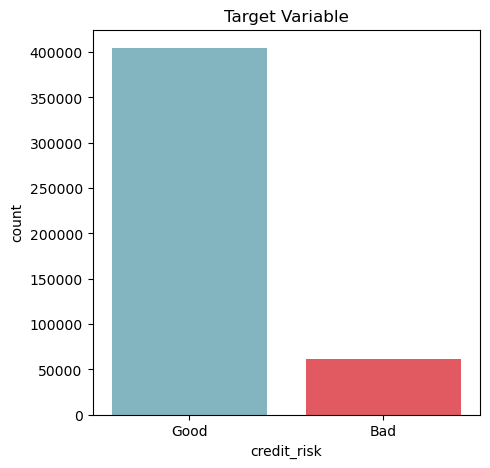

In [ ]:
plt.figure(figsize=(5, 5))
colors = ['#78BCCA', '#F7444E']
sns.countplot(x=df["credit_risk"], palette=colors)
plt.title("Target Variable")
plt.show()

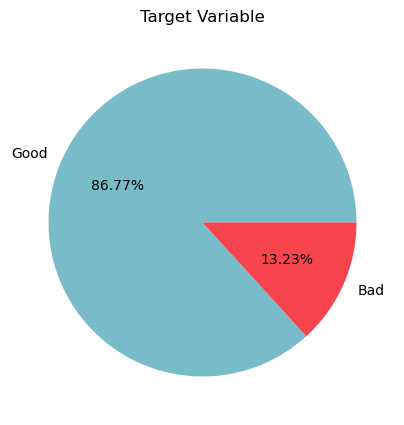

In [ ]:
# percentage of class present in target variable(y)
target = df['credit_risk'].value_counts()
label = target.index

plt.figure(figsize=(5, 5))

# Define custom colors for Good and Bad
colors = ['#78BCCA', '#F7444E']

plt.pie(target, labels=label, autopct='%.2f%%', colors=colors)
plt.title('Target Variable')
plt.show()

##Statistical Summary

In [ ]:
# group column names based on type
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [ ]:
cat

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'credit_risk']

In [ ]:
num

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

##Univariate Analysis

###Categorical

In [ ]:
# value counts num columns
for col in cat:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of term column
 36 months    337953
 60 months    128332
Name: term, dtype: int64 

Value counts of grade column
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64 

Value counts of sub_grade column
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64 

Value counts of emp_title column
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                  

- Ada kolom yang hanya memiliki satu nilai unik yaitu `application_type`
- terdapat beberapa kolom identitas (semua unik) yaitu `zip_code`, `url`.


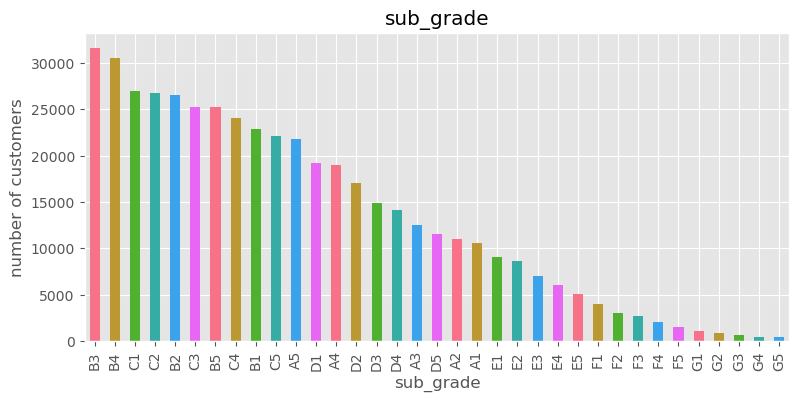

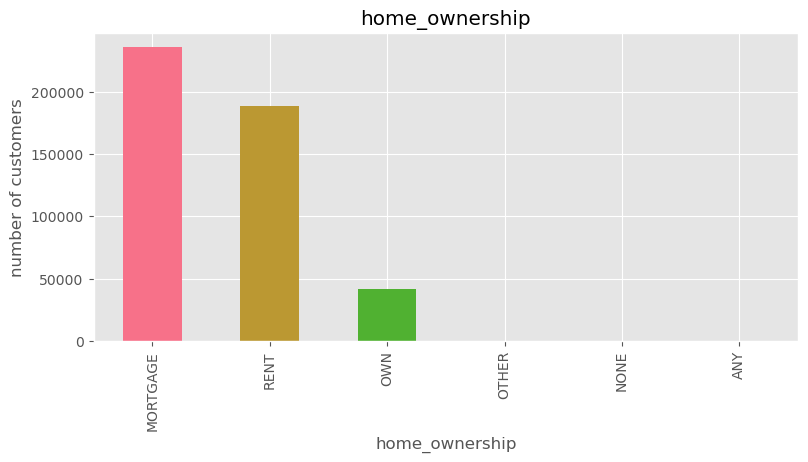

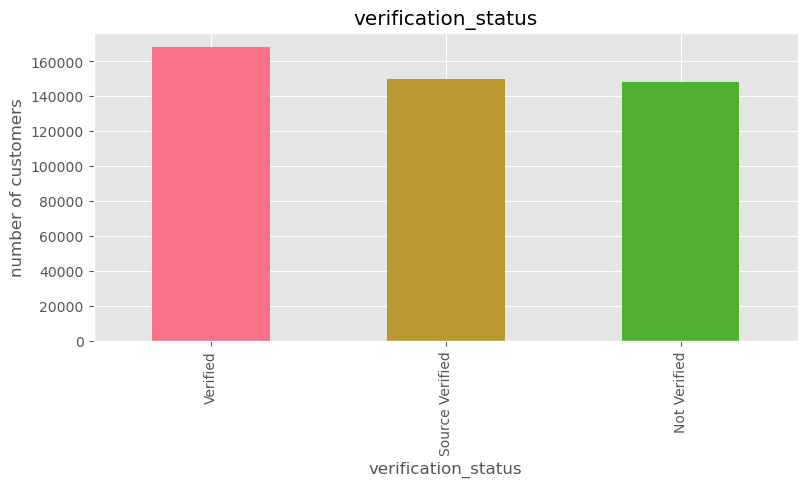

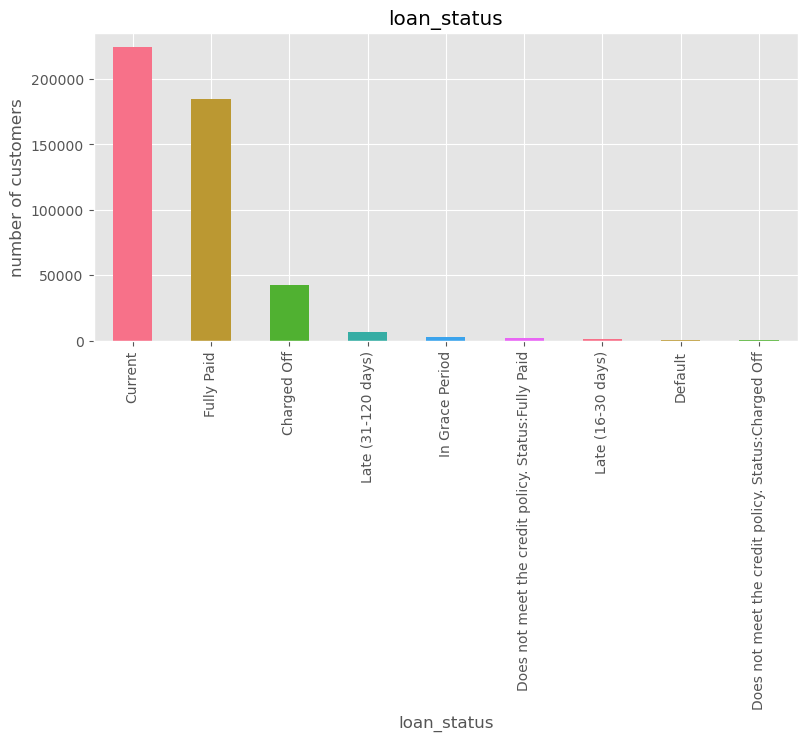

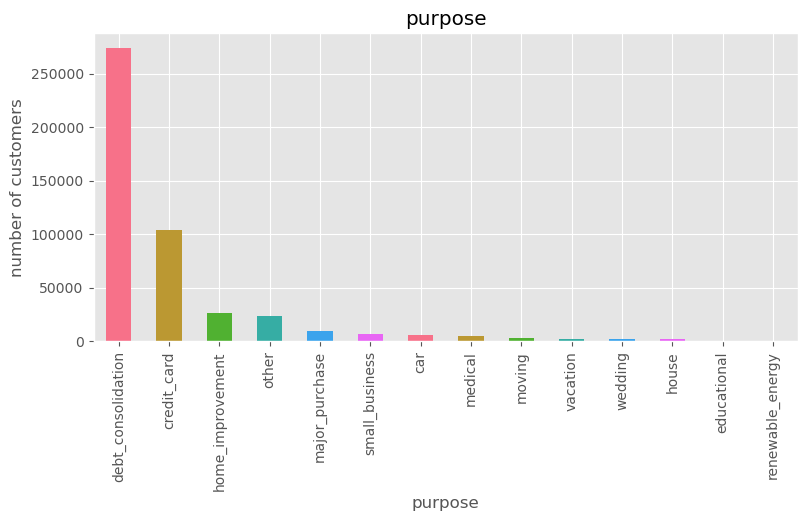

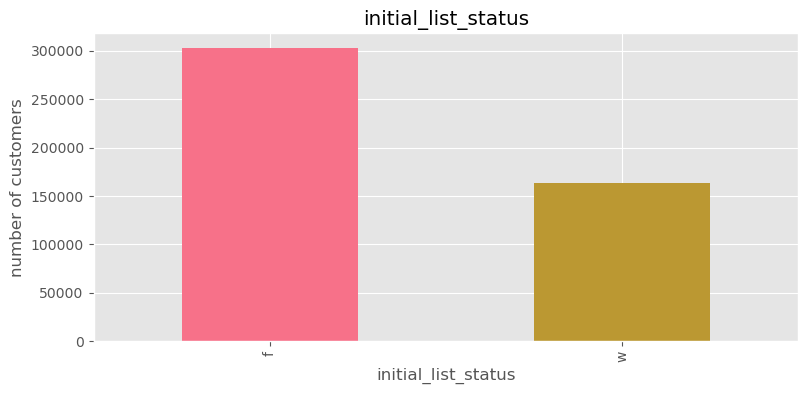

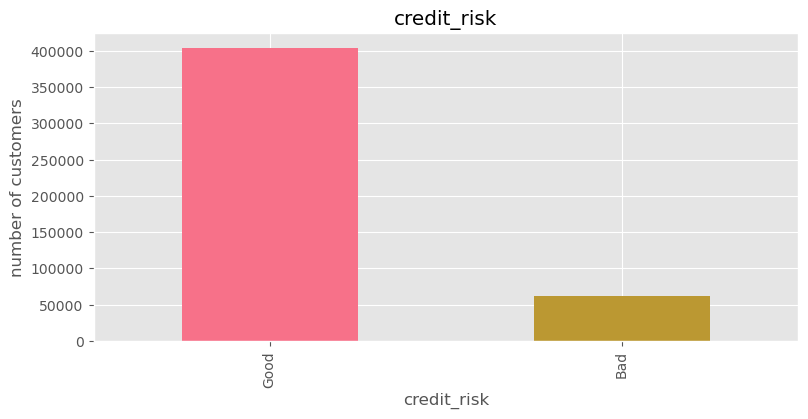

In [ ]:
# indentifying the categorical variables
cat_var = ['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status','credit_risk']

# plotting bar chart for each categorical variable
plt.style.use("ggplot")
colors = sns.color_palette("husl")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar", color=colors)
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

Observation:
- Ada kolom yang hanya memiliki satu nilai unik yaitu `application_type`
- terdapat beberapa kolom identitas (semua unik) yaitu `zip_code`, `url`.



---



1. Term, lebih banyak yang memilih pinjaman selama 36 bulan(3 tahun) dibanding 60 bulan(5 tahun)
2. Grade, paling banyak di grade B dan C
Sub_grade, teratas adalah B3
3. Employment length in years (Emp_length), mayoritas memiliki pengalaman bekerja 10+ tahun
4. The Home ownership (home_ownership), mayoritas lebih banyak yang memiliki status kepemilikan mortgage, artinya merek memiliki pinjaman yang dijamin dengan properti tersebut sebagai pinjaman.
5. Verified status (verification_status), kurang lebih semua hampir setara namun peminjam yang sudah diverifikasi lebih banyak.
6. Loan_status, status pinjaman paling banyak berada di current, diurutan kedua ada fully paid.
7. Payment_plan,  ini mengindikasikan bahwa mayoritas(n) tidak ada rencana pembayaran khusus yang diterapkan.
8. Purpose, kategori yang paling banyak dipinjam untuk mengajukan pinjaman bertujuan untuk debt_consolidation. Bisa digunakan untuk membayar utang kartu kredit, pinjaman pribadi, atau utang lainnya.
9. Addr_state, mayoritas alamat yang terdaftar berasal dari berada paling banyak di CA(Canada), NY(New York), dan TX(Texas).
10. Initial_list_status, mayoritas telah sepenuhnya melunasi pinjaman atau telah membayar( f (fully paid)).
11. Credit_risk, mayoritas peminjam berada dalam kategori good.






###Numeric

Jika analisa yang dilakukan dalam bentuk kuantitatif (numerikal) , maka bentuk grafik yang bisa digunakan adalah Histogram, Density plot, Boxplot

In [ ]:
# value counts num columns
for col in num:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Unnamed: 0 column
0         1
310839    1
310865    1
310864    1
310863    1
         ..
155424    1
155423    1
155422    1
155421    1
466284    1
Name: Unnamed: 0, Length: 466285, dtype: int64 

Value counts of id column
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: id, Length: 466285, dtype: int64 

Value counts of member_id column
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: member_id, Length: 466285, dtype: int64 

Value counts of loan_amnt column
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: loan_amnt, Length: 1352, dtype: int64 

Value counts of funded_amnt column
10000    32930
12000    25426
15000    23370
20000

- Ada kolom yang hanya memiliki satu nilai unik yaitu `policy_code`
- terdapat beberapa kolom identitas (semua unik) yaitu `Unnamed: 0`, `id`, `member_id`.

In [ ]:
num_var = ['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'issue_d',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

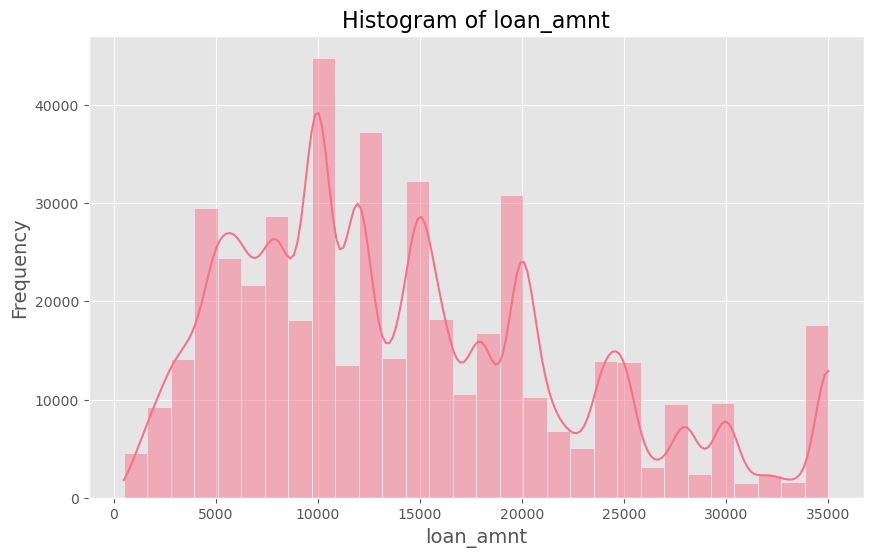

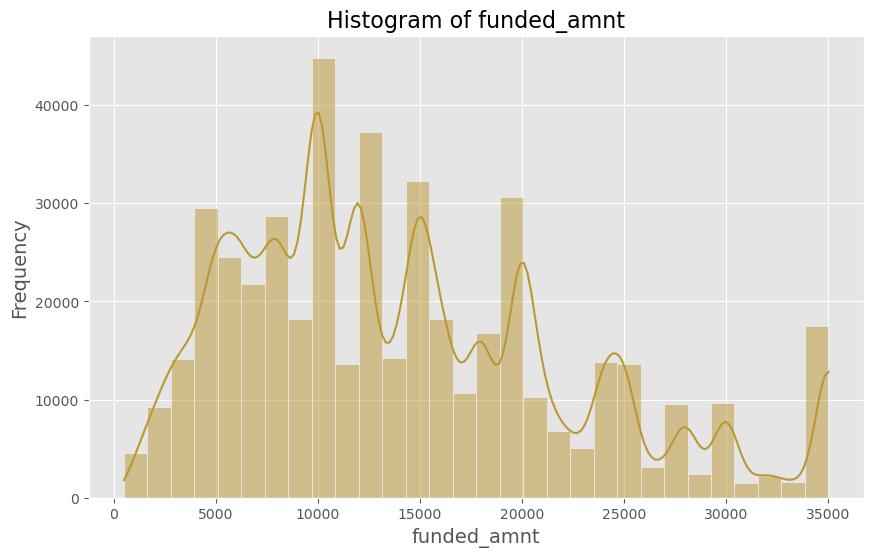

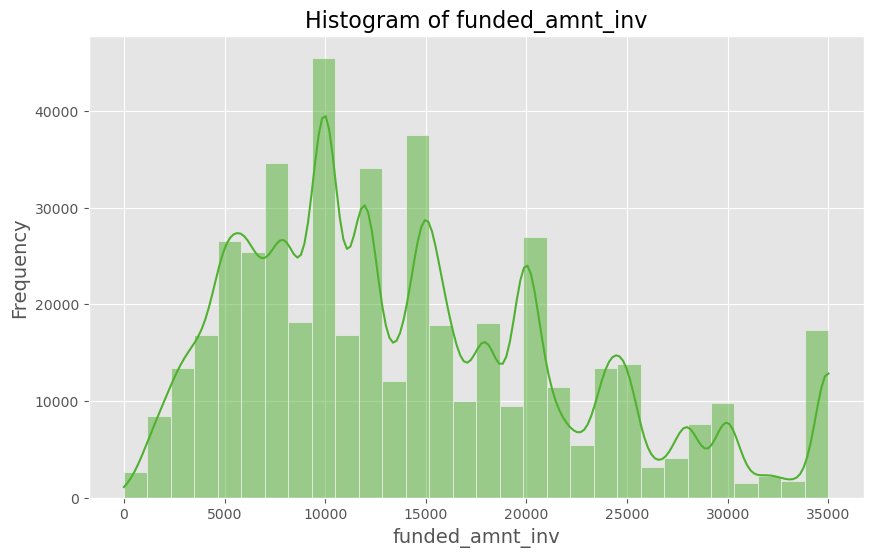

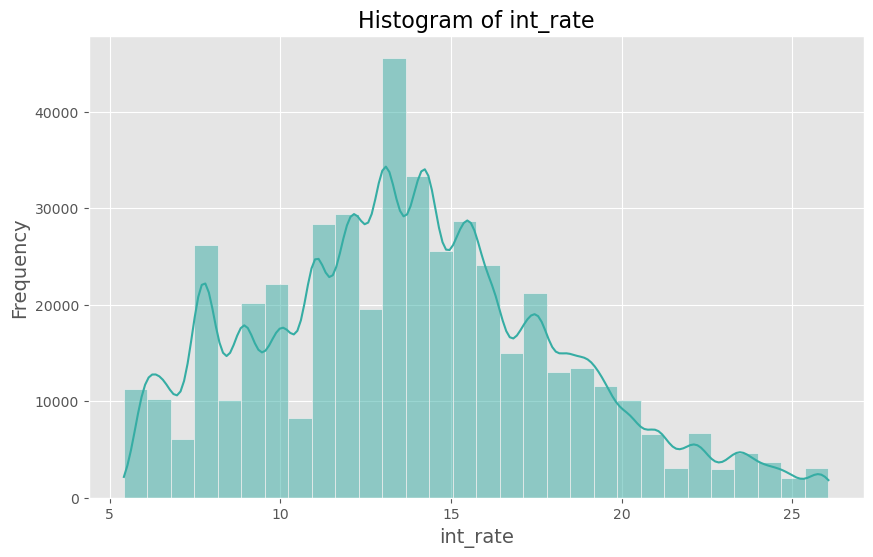

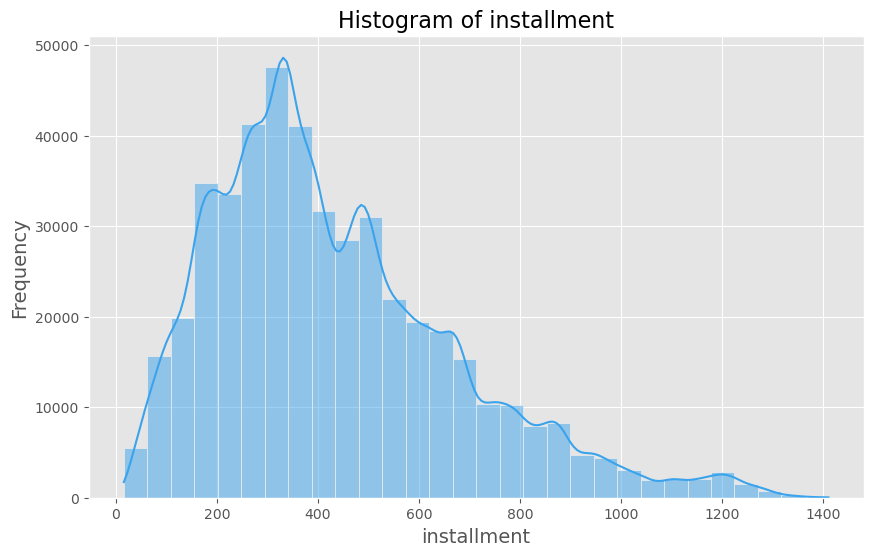

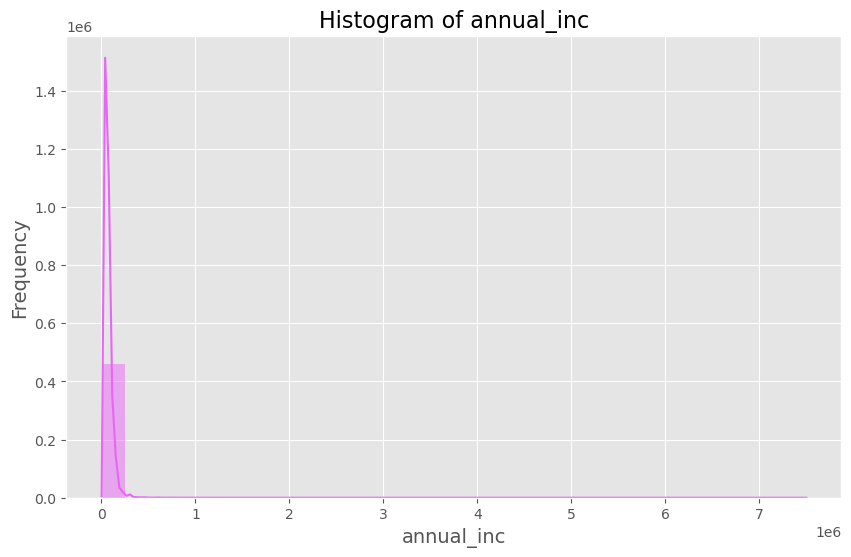

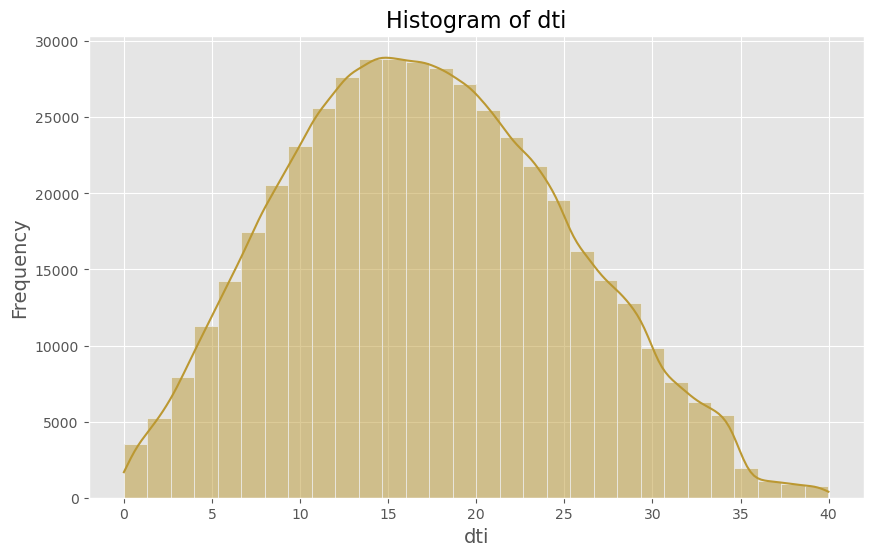

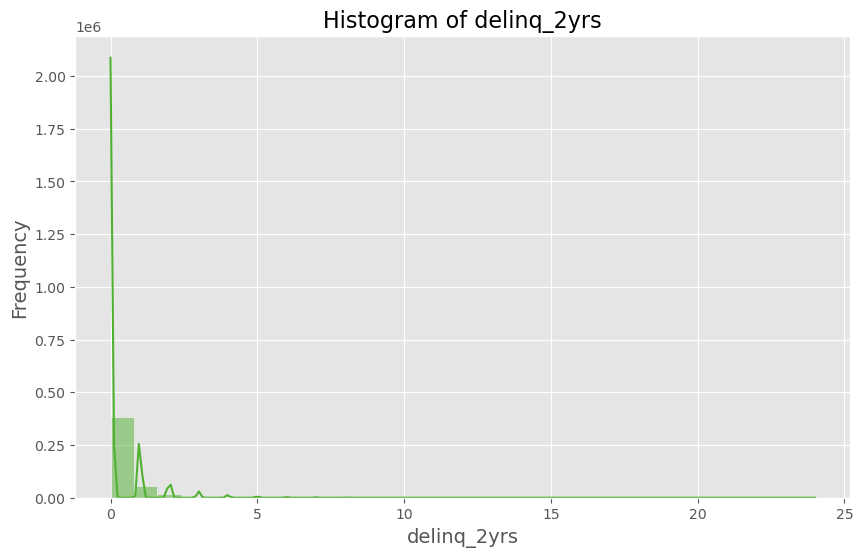

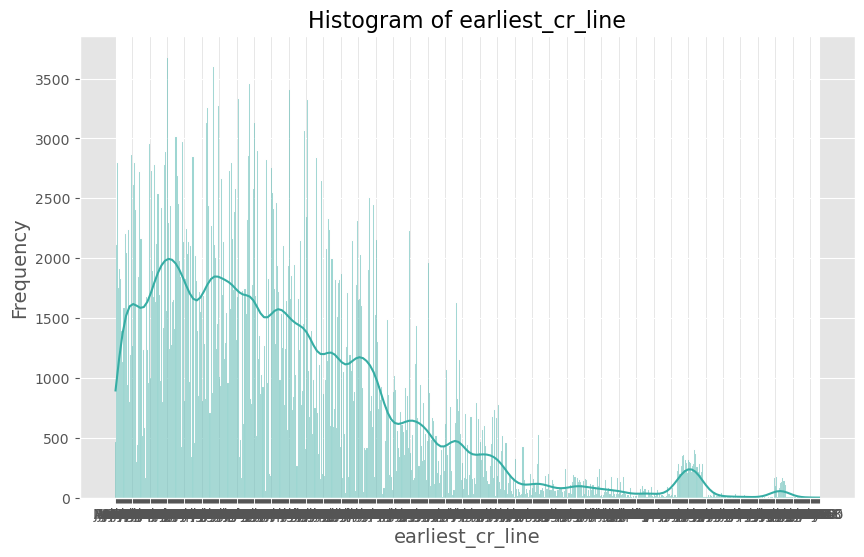

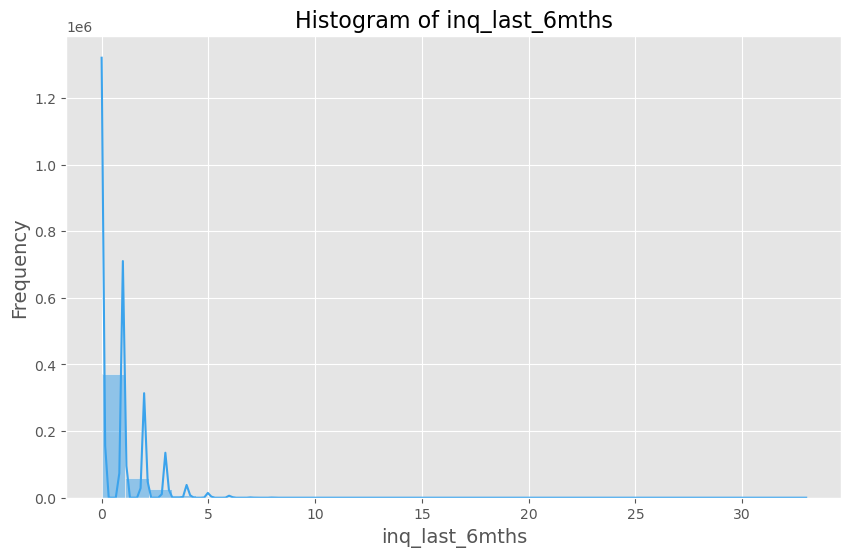

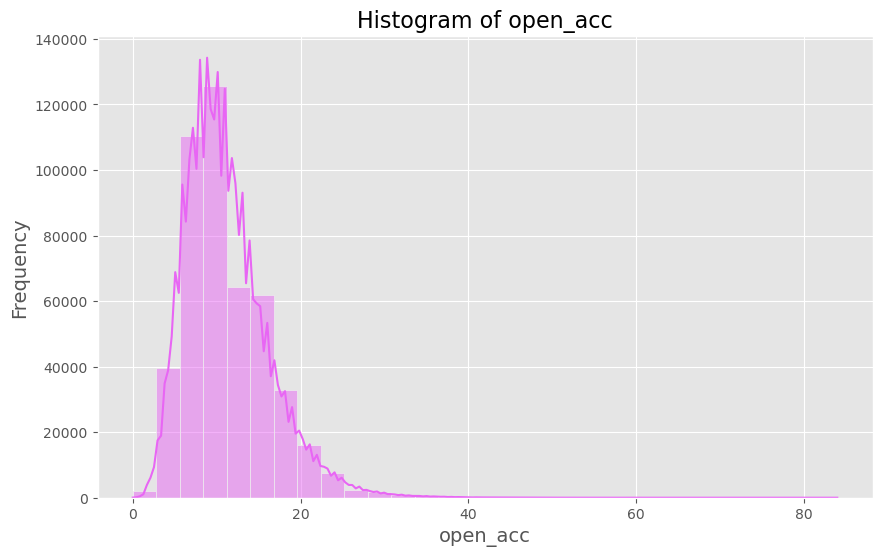

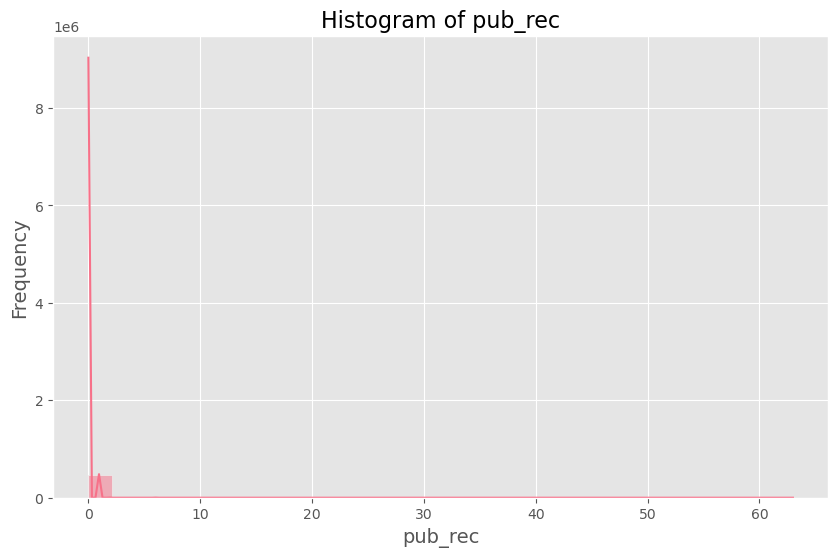

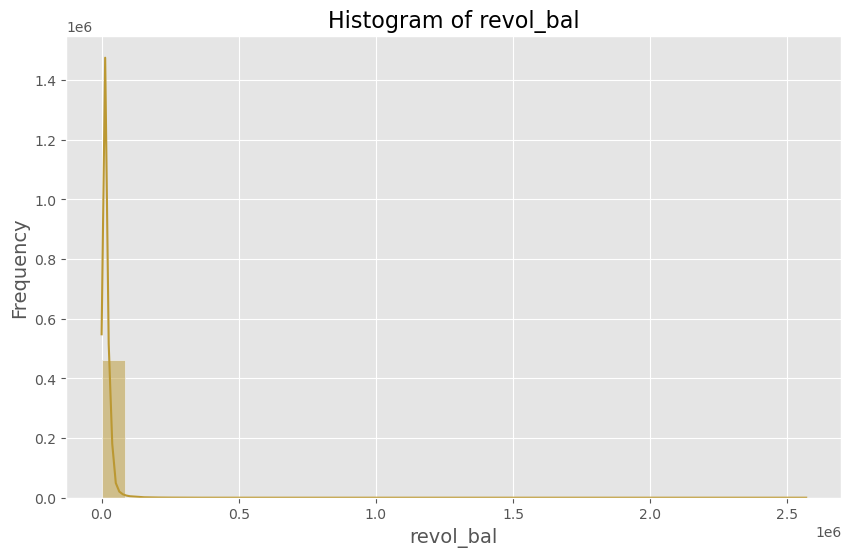

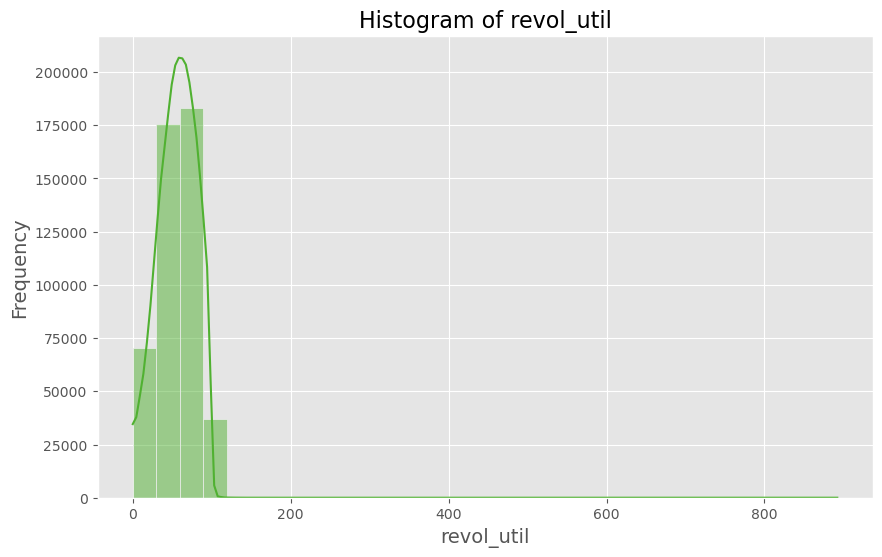

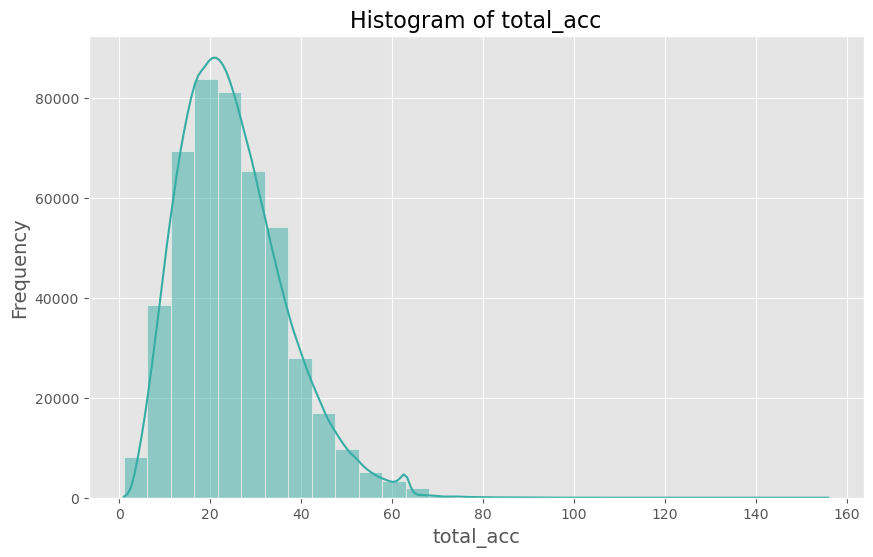

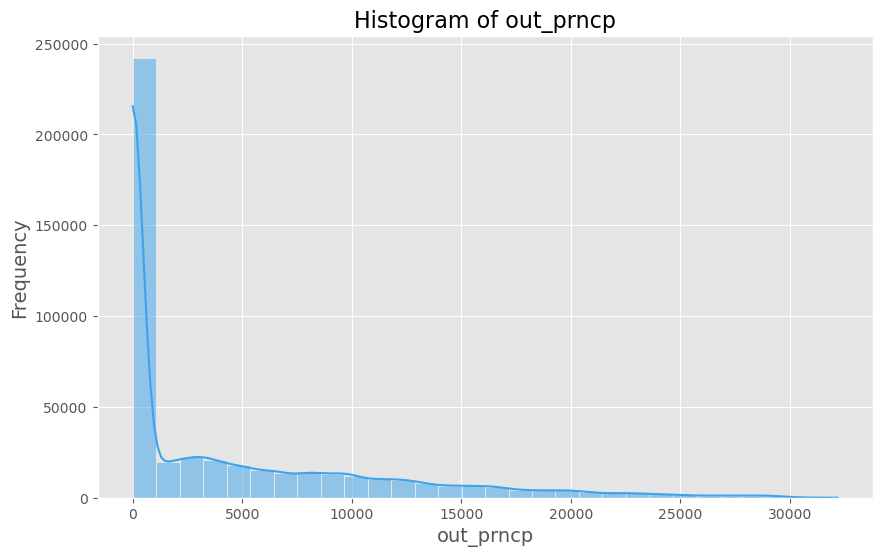

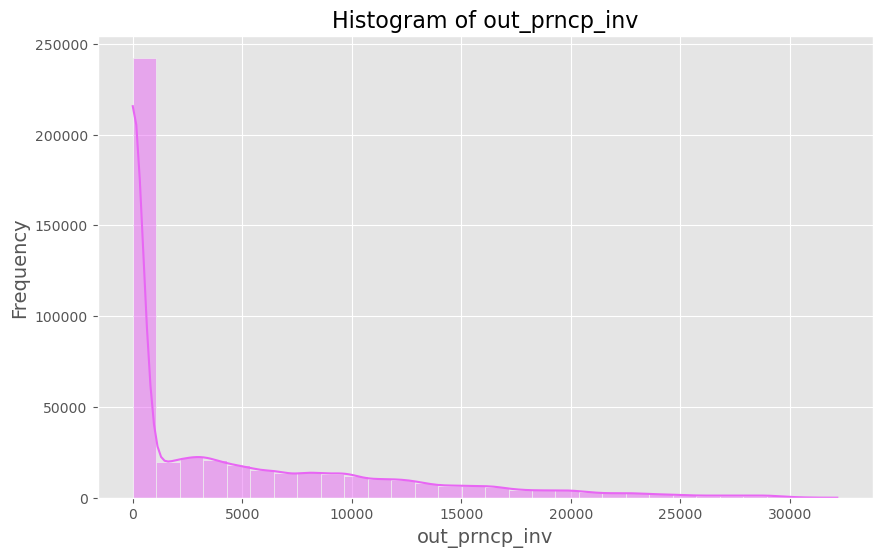

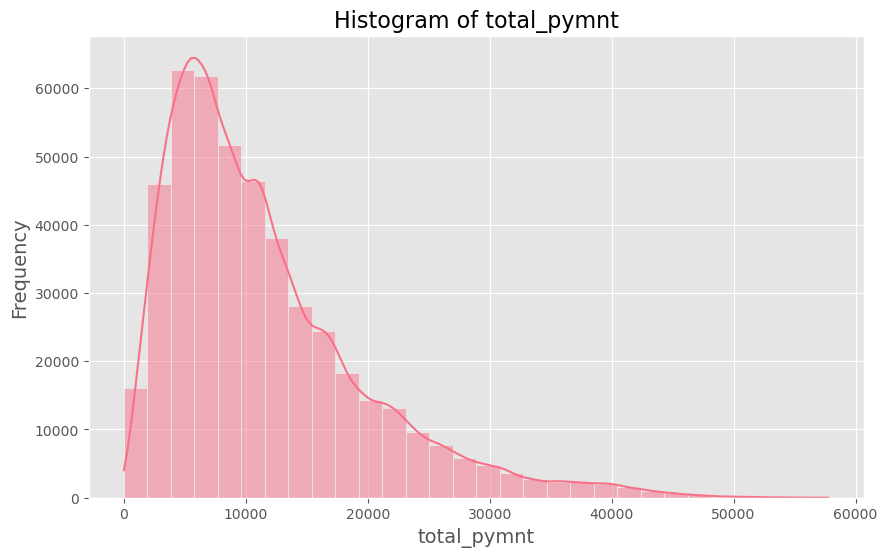

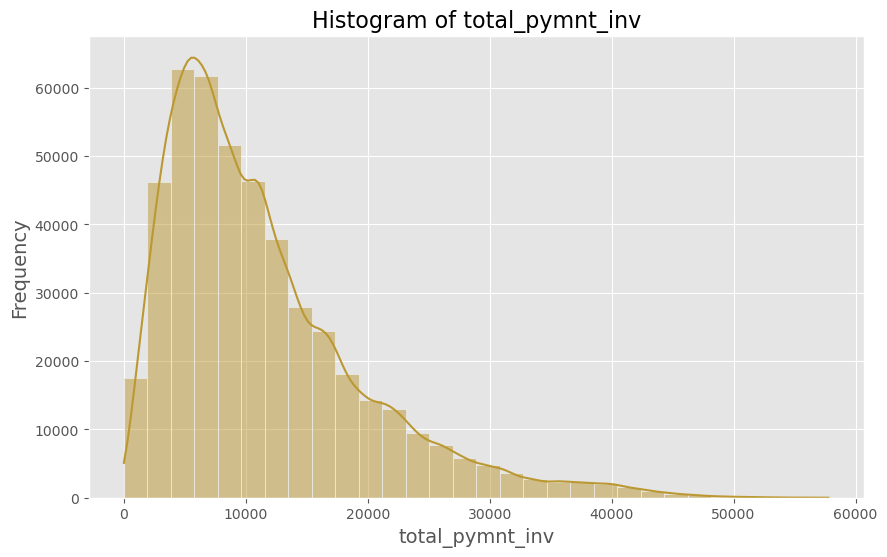

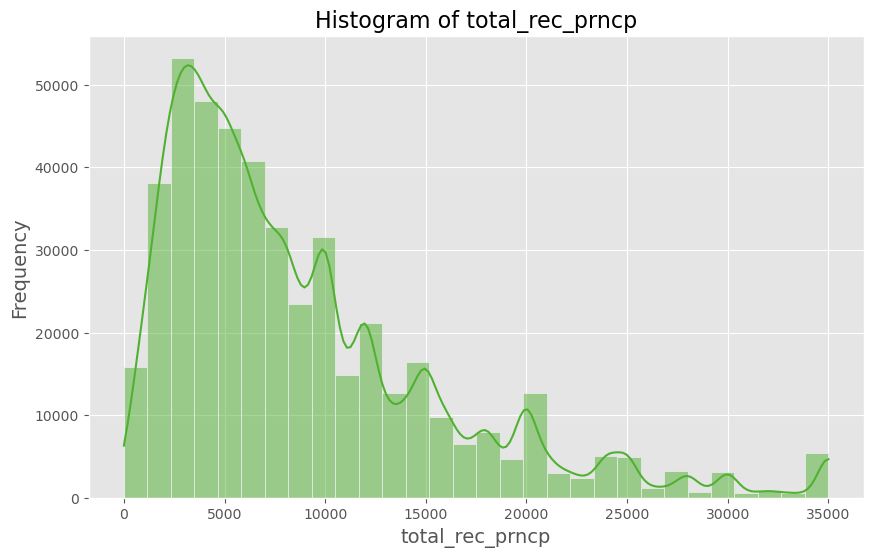

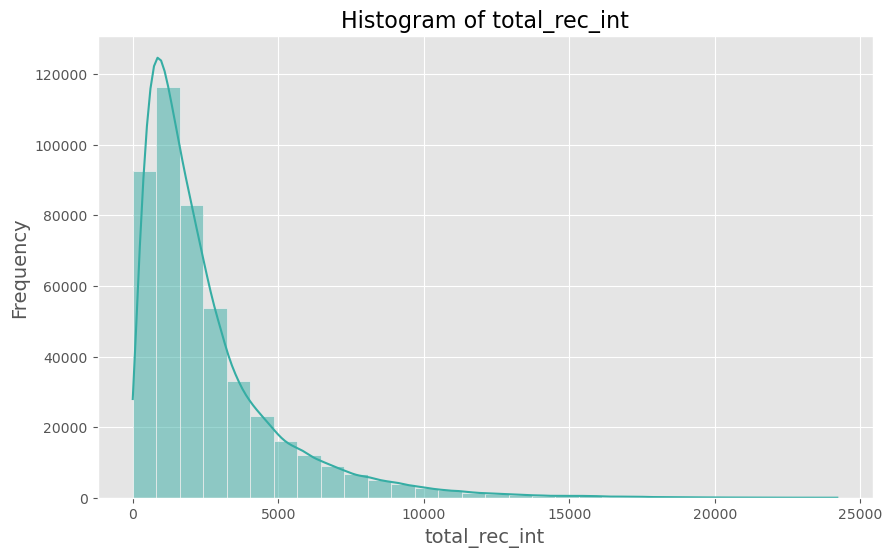

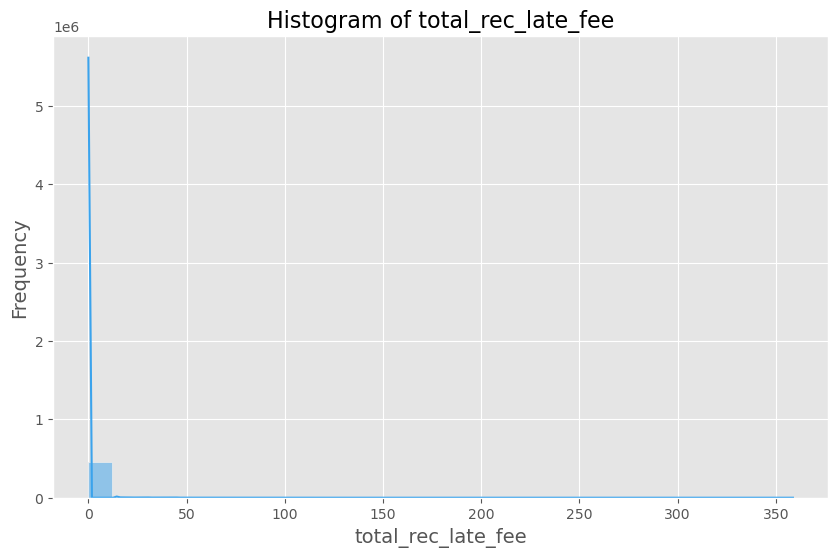

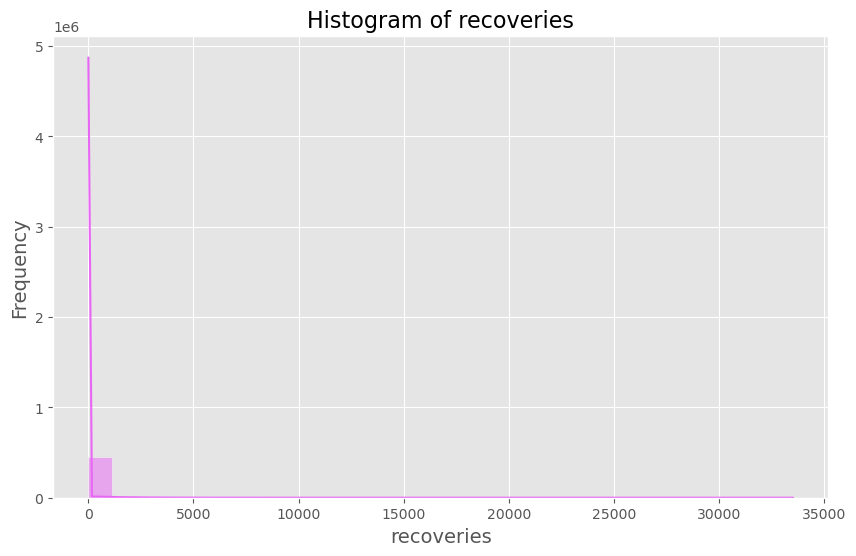

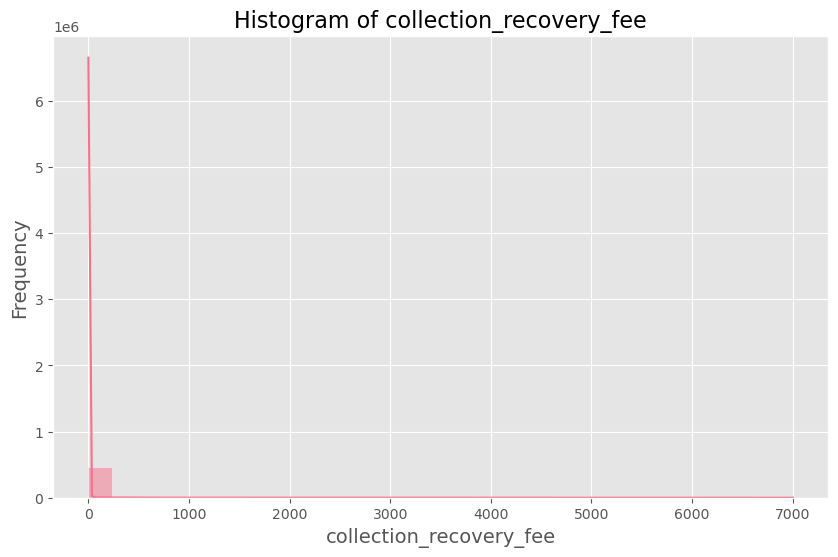

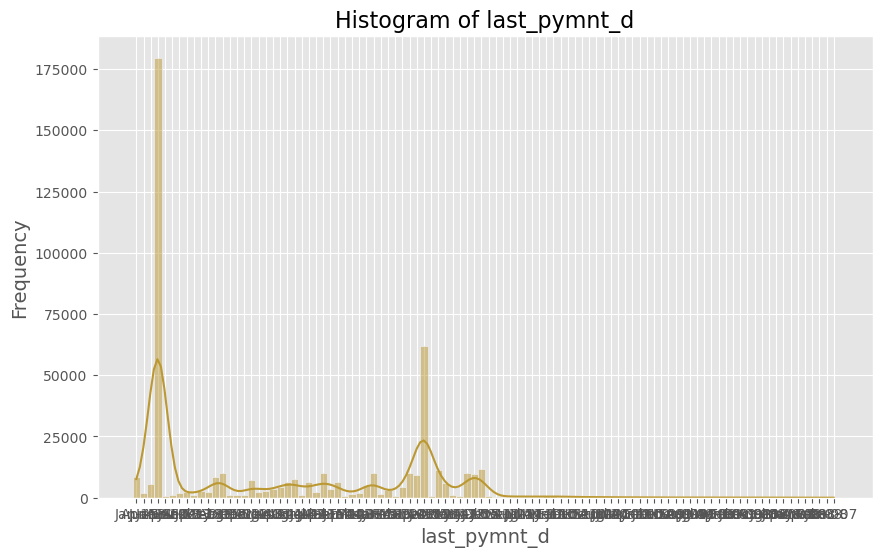

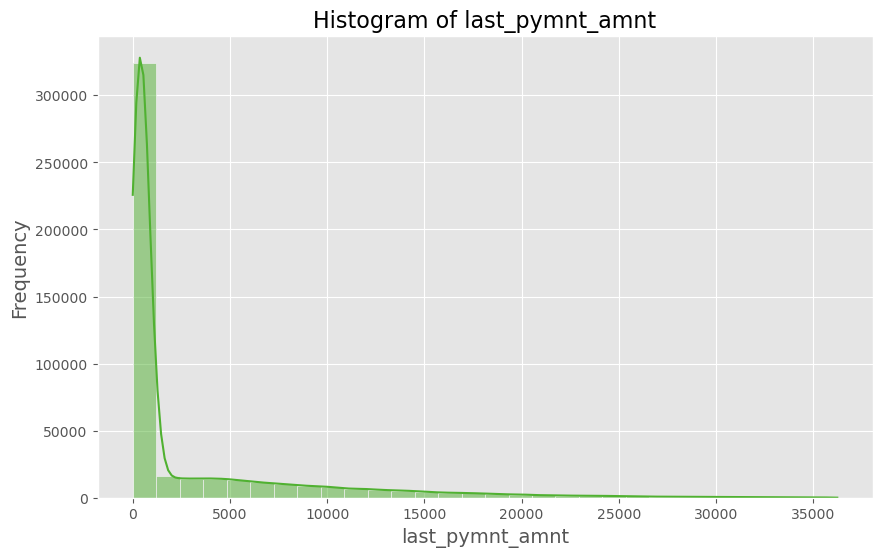

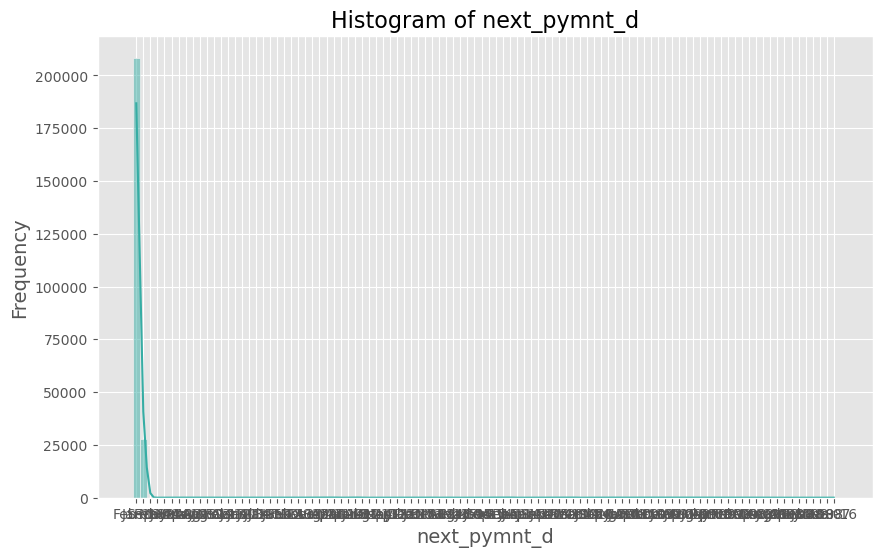

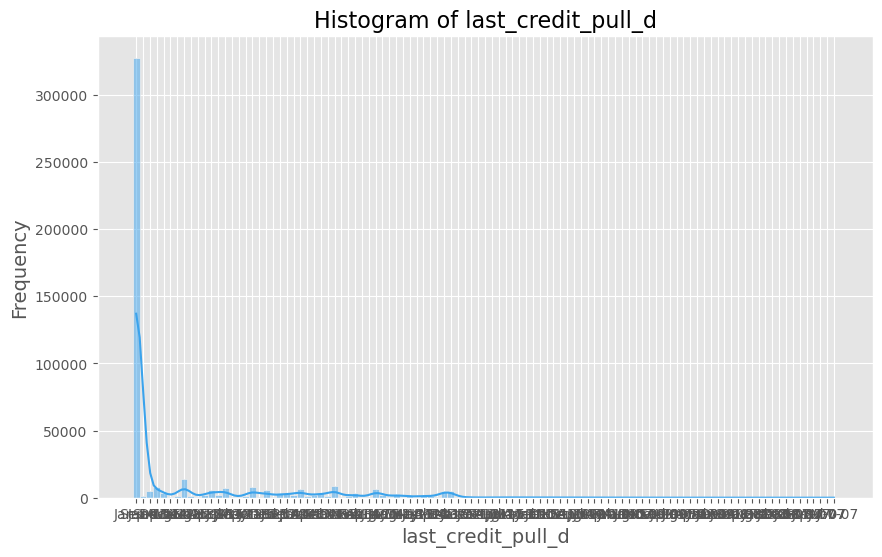

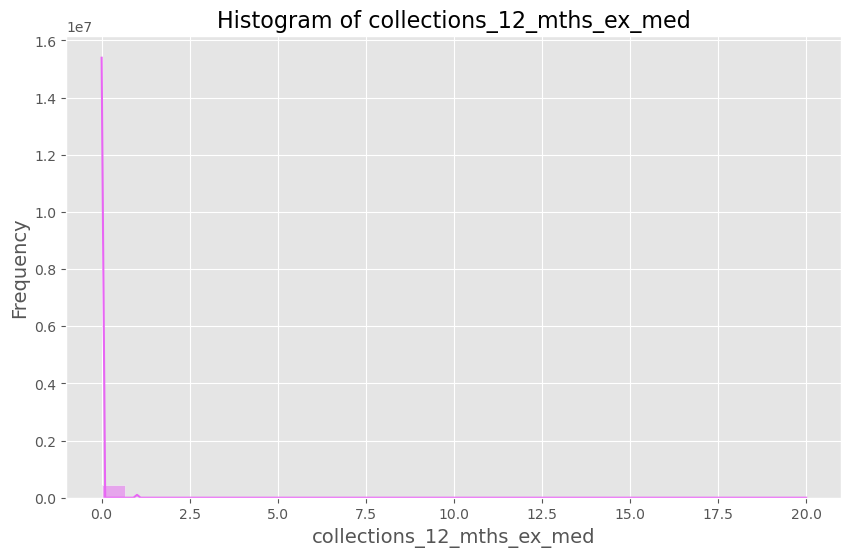

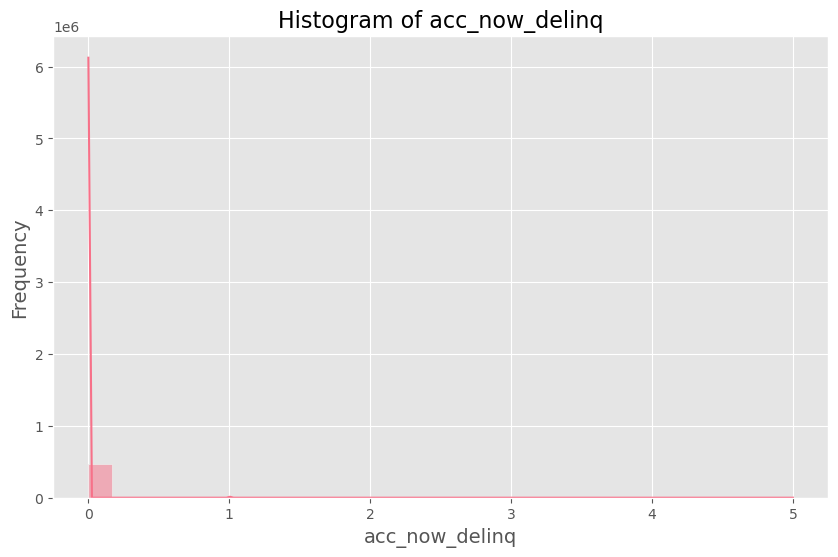

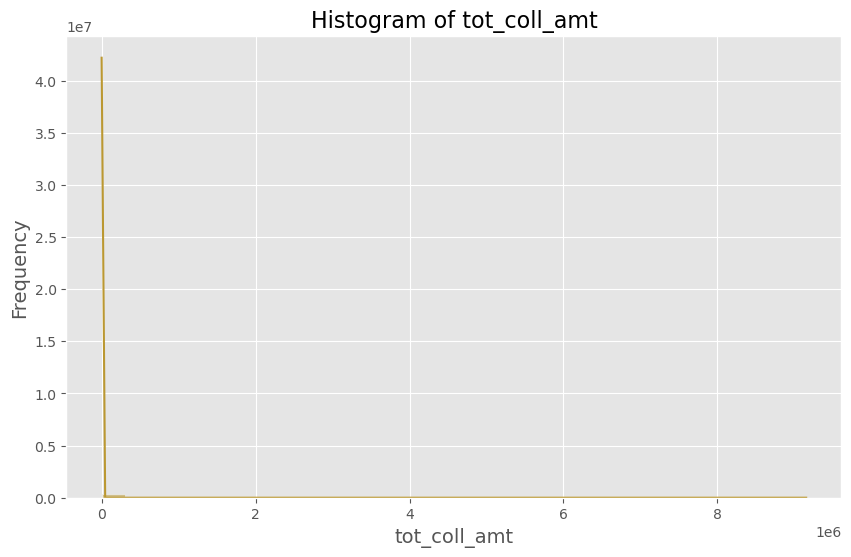

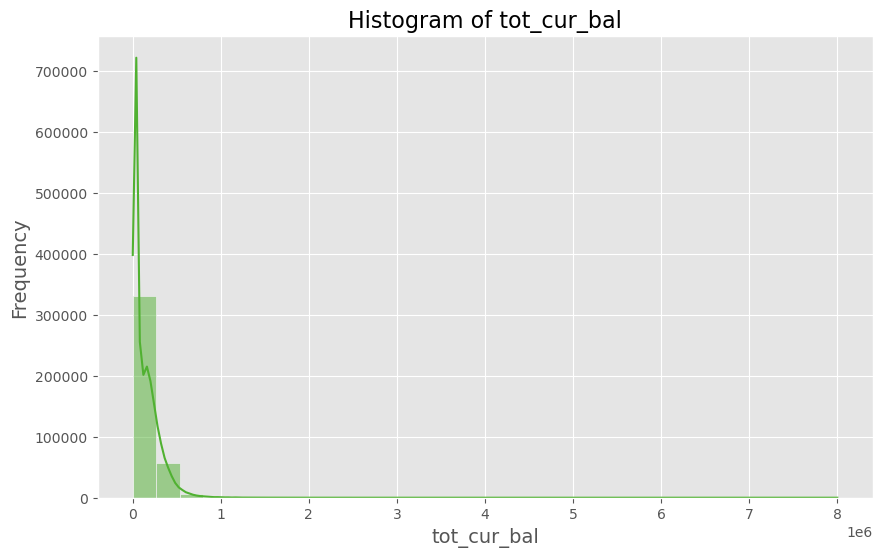

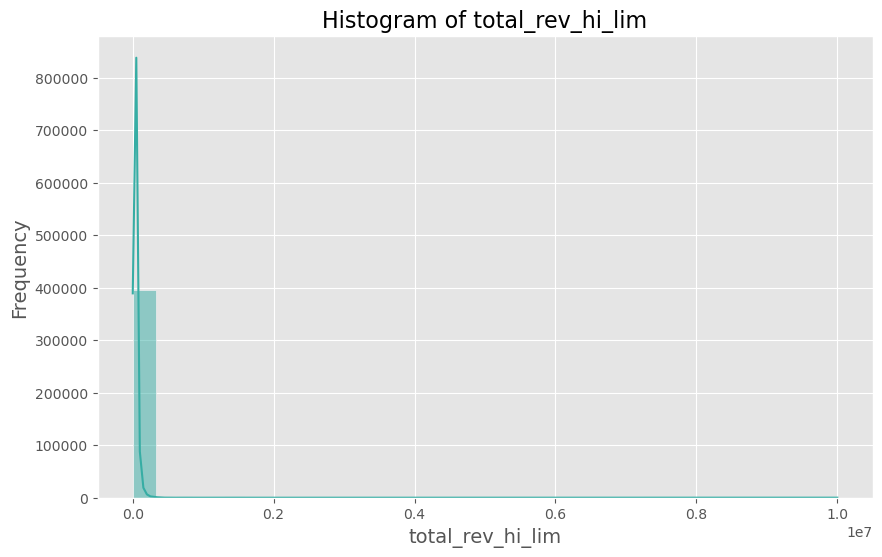

In [ ]:
# Setel gaya plot
plt.style.use("ggplot")
colors = sns.color_palette("husl")

# Loop untuk membuat histogram untuk setiap kolom dalam daftar cols
for i, column in enumerate(num_var):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True, color=colors[i % len(colors)])

    plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    plt.show()



* Ada kolom yang hanya memiliki satu nilai unik yaitu `policy_code`
* terdapat beberapa kolom identitas (semua unik) yaitu `Unnamed: 0`, `id`, `member_id`.

* Distribusi Fitur yang Miring (Skewed):
Seperti yang terlihat dari histogram, fitur-fitur  'annual_inc',
 'issue_d',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim'


##Bivariate Analysis

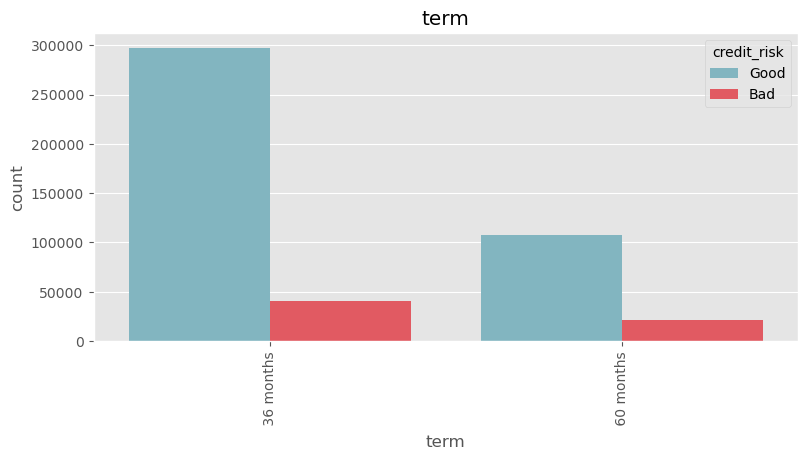

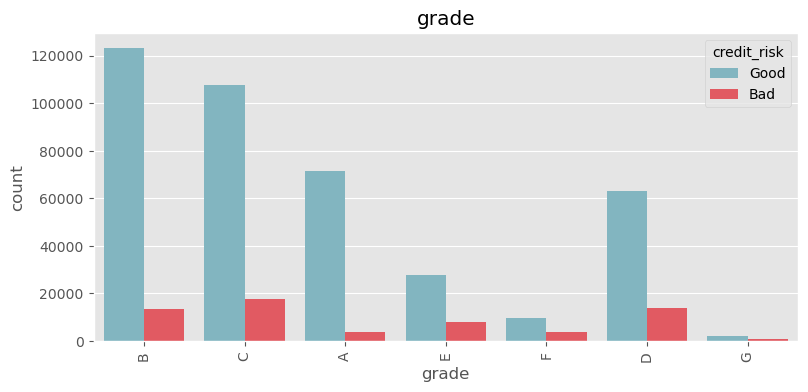

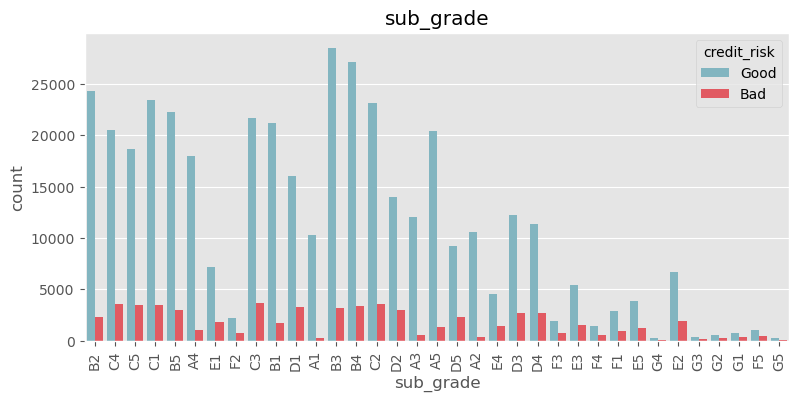

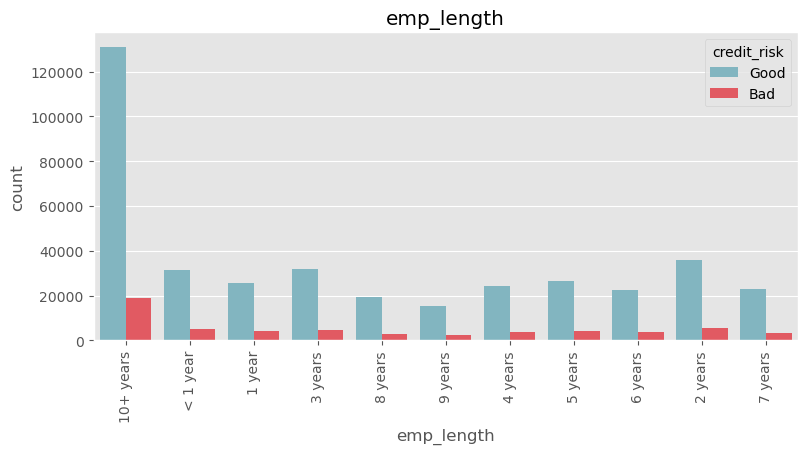

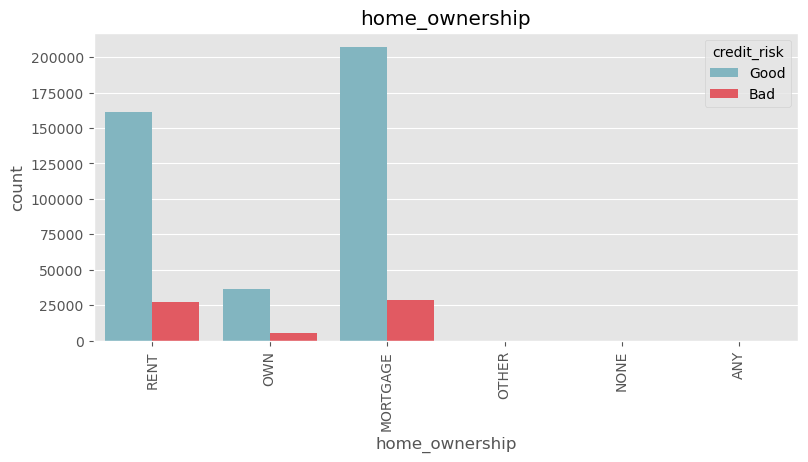

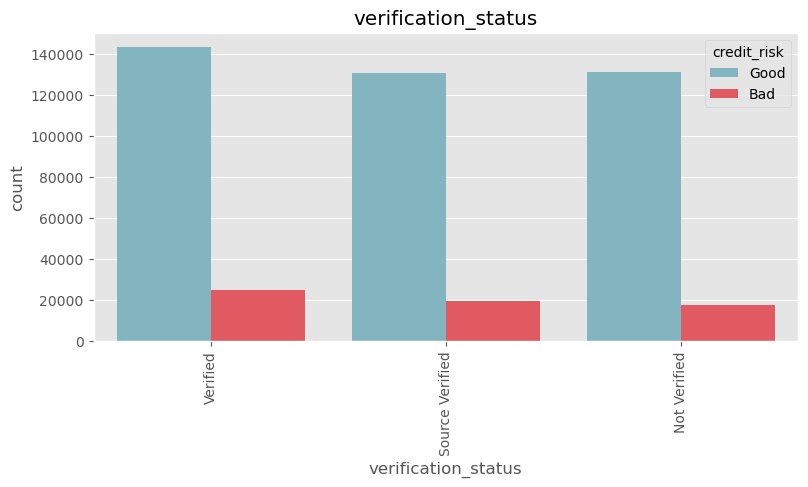

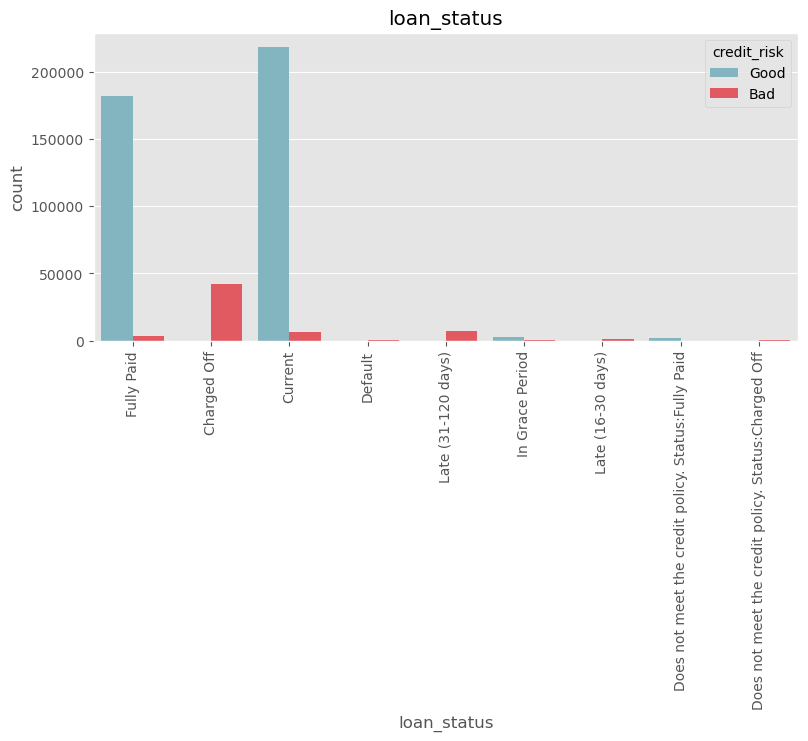

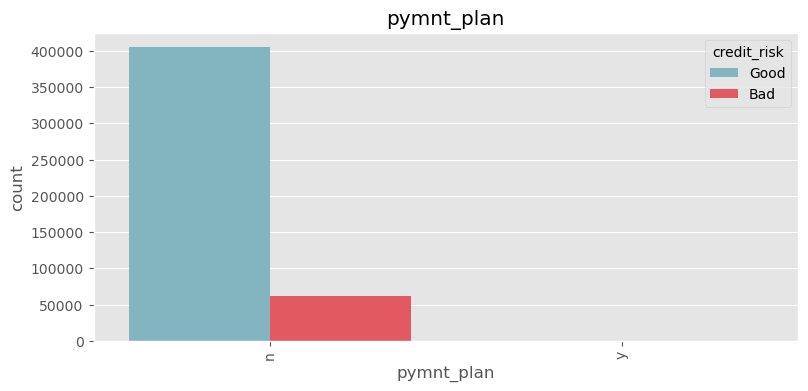

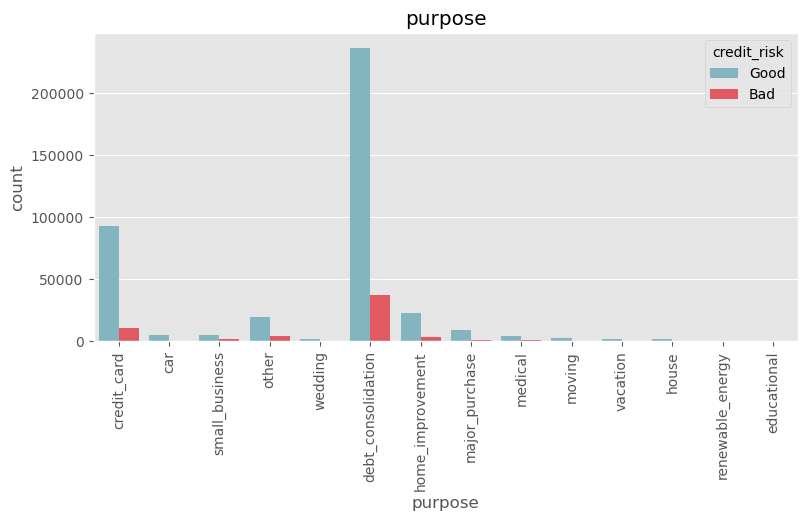

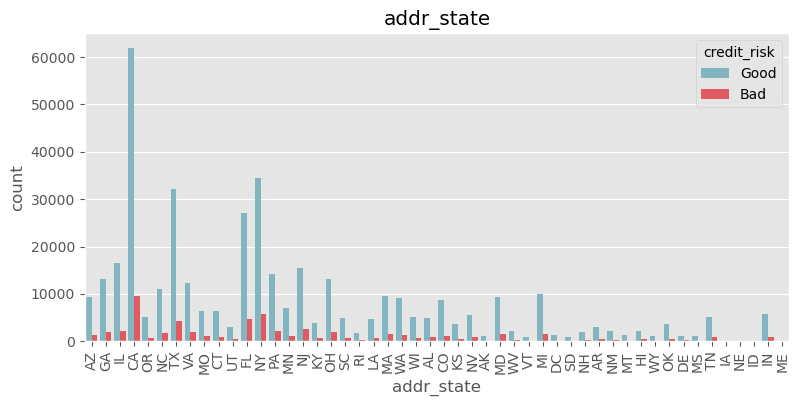

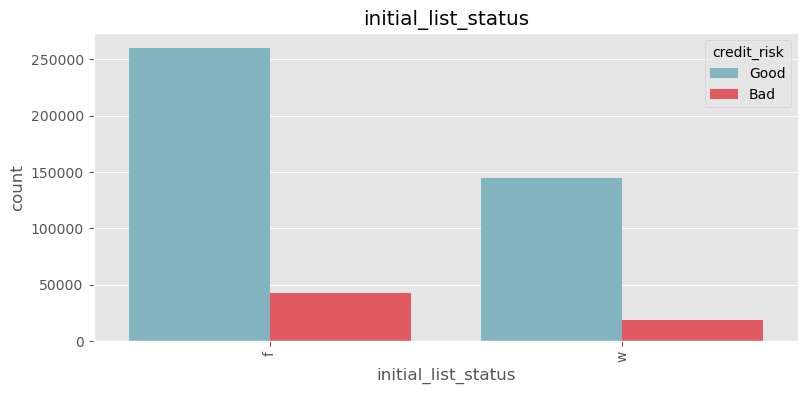

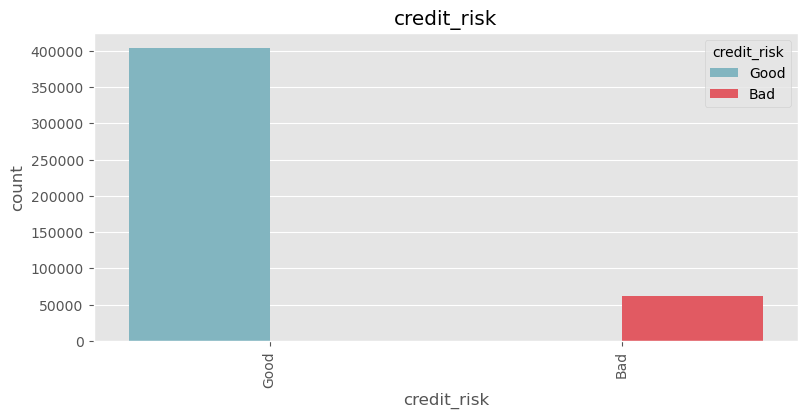

In [ ]:
plt.style.use("ggplot")
colors = ['#78BCCA', '#F7444E']

for column in cat_var:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.countplot(x=df[column], hue=df["credit_risk"], palette=colors)
    plt.title(column)
    plt.xticks(rotation=90)

    plt.show()

#Data Preparation

##Handling Missing Value

In [ ]:
#To check which columns have a missing value
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
credit_risk              0
Length: 76, dtype: int64

In [ ]:
#Mengecek kolom mana saja yang kehilangan dalam bentuk persen
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
data_null

feature  missing_value  percentage
0            mths_since_rcnt_il         466285      100.00
1                   open_rv_12m         466285      100.00
2                   open_il_24m         466285      100.00
3                   open_acc_6m         466285      100.00
4                  total_bal_il         466285      100.00
5     verification_status_joint         466285      100.00
6                     dti_joint         466285      100.00
7                       il_util         466285      100.00
8                   open_rv_24m         466285      100.00
9                    open_il_6m         466285      100.00
10                   max_bal_bc         466285      100.00
11                     all_util         466285      100.00
12             annual_inc_joint         466285      100.00
13                       inq_fi         466285      100.00
14                  total_cu_tl         466285      100.00
15                 inq_last_12m         466285      100.00
16                  open_il_12m         466285      100.00
17       mths_since_last_record         403647       86.57
18  mths_since_last_major_derog         367311       78.77
19                         desc         340302       72.98
20       mths_since_last_delinq         250351       53.69
21                 next_pymnt_d         227214       48.73
22                 tot_coll_amt          70276       15.07
23             total_rev_hi_lim          70276       15.07
24                  tot_cur_bal          70276       15.07
25                    emp_title          27588        5.92
26                   emp_length          21008        4.51
27                 last_pymnt_d            376        0.08
28                   revol_util            340        0.07
29   collections_12_mths_ex_med            145        0.03
30               inq_last_6mths             29        0.01
31                     open_acc             29        0.01
32                      pub_rec             29        0.01
33             earliest_cr_line             29        0.01
34                    total_acc             29        0.01
35                  delinq_2yrs             29        0.01
36           last_credit_pull_d             42        0.01
37               acc_now_delinq             29        0.01

Observation:
1. apabila memiliki missing value lebih dari 50% - 60% maka sebaiknya di drop.
2. sisanya bisa menggunakan agg dengan data median

In [ ]:
# Menghapus kolom-kolom yang memiliki value null
unnecessary = ['inq_last_12m', 'total_bal_il', 'annual_inc_joint',
                         'dti_joint', 'verification_status_joint',	'open_acc_6m',
                         'open_il_12m',	'open_il_24m',	'mths_since_rcnt_il',
                         'open_il_6m', 'il_util',	'total_cu_tl',
                         'open_rv_12m',	'open_rv_24m',	'max_bal_bc',
                         'all_util', 'inq_fi', 'mths_since_last_record',
                         'mths_since_last_major_derog',	'desc', 'mths_since_last_delinq']
df = df.drop(unnecessary, axis=1)

In [ ]:
#Gunakan median
df['total_rev_hi_lim']= df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median())
df['tot_coll_amt']= df['tot_coll_amt'].fillna(df['tot_coll_amt'].median())
df['tot_cur_bal']= df['tot_cur_bal'].fillna(df['tot_cur_bal'].median())

In [ ]:
#ubah datetime lalu lakukan fillna menggunakan median
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['next_pymnt_d']= df['next_pymnt_d'].fillna(df['next_pymnt_d'].median())

In [ ]:
# droping missing values rows untuk sisanya
df.dropna(inplace = True)

In [ ]:
#check lagi
df.isnull().sum()

Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

##Feature Engineering

In [ ]:
df.sample(5)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
424057      424057  12927295   14959493      10000        10000   
83971        83971   7664862    9347003      14000        14000   
146231      146231   4225411    5397633      35000        35000   
323103      323103  24685482   27128434       5000         5000   
343232      343232  20811456   23083947      11650        11650   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
424057          10000.0   36 months     11.99       332.10     B  ...   
83971           14000.0   36 months     19.52       516.88     D  ...   
146231          35000.0   36 months     21.98      1336.31     E  ...   
323103           5000.0   36 months     13.35       169.32     C  ...   
343232          11650.0   36 months     15.61       407.34     D  ...   

       next_pymnt_d last_credit_pull_d collections_12_mths_ex_med policy_code  \
424057   2016-02-01             Jan-16                        0.0           1   
83971    2016-02-01             Oct-15                        0.0           1   
146231   2016-01-01             Jan-16                        0.0           1   
323103   2016-02-01             Jan-16                        0.0           1   
343232   2016-02-01             Jan-16                        0.0           1   

        application_type acc_now_delinq tot_coll_amt tot_cur_bal  \
424057        INDIVIDUAL            0.0        319.0     78472.0   
83971         INDIVIDUAL            0.0        281.0     27460.0   
146231        INDIVIDUAL            0.0          0.0     70573.0   
323103        INDIVIDUAL            0.0          0.0    125847.0   
343232        INDIVIDUAL            0.0       4304.0    107499.0   

       total_rev_hi_lim credit_risk  
424057          20300.0        Good  
83971           16100.0        Good  
146231          60000.0        Good  
323103          41200.0        Good  
343232          25700.0        Good  

[5 rows x 55 columns]

last_credit_pull_d , last_pymnt_d , earliest_cr_line , issue_d perlu diubah ke datetime

In [ ]:
# Daftar kolom yang perlu diubah ke datetime
date_columns = ['last_credit_pull_d', 'last_pymnt_d', 'earliest_cr_line', 'issue_d']

# Mengubah kolom-kolom tersebut ke tipe data datetime
df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, format='%b-%y'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437710 entries, 1 to 466283
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unnamed: 0                  437710 non-null  int64         
 1   id                          437710 non-null  int64         
 2   member_id                   437710 non-null  int64         
 3   loan_amnt                   437710 non-null  int64         
 4   funded_amnt                 437710 non-null  int64         
 5   funded_amnt_inv             437710 non-null  float64       
 6   term                        437710 non-null  object        
 7   int_rate                    437710 non-null  float64       
 8   installment                 437710 non-null  float64       
 9   grade                       437710 non-null  object        
 10  sub_grade                   437710 non-null  object        
 11  emp_title                   437710 non-

In [ ]:
#Incase something happens
base = df.copy()

In [ ]:
#drop the unnecessary colum because its only have one unique value, identity column, and the column that high correlated with the target.
unnecessary = ['application_type',
               'policy_code',
               'Unnamed: 0','id',
               'member_id', 'zip_code',
               'url', 'loan_status', 'delinq_2yrs']
df = df.drop(unnecessary, axis=1)

##Label Encoding

In [ ]:
cat_var = ['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'credit_risk']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_var:
   df[i] = le.fit_transform(df[i])
df.sample(5).T

403012        227864       221445  \
loan_amnt                     5000.000000   12000.00000   30000.0000   
funded_amnt                   5000.000000   12000.00000   30000.0000   
funded_amnt_inv               5000.000000   12000.00000   30000.0000   
term                             0.000000       0.00000       0.0000   
int_rate                        21.990000       9.91000       7.6200   
installment                    190.930000     386.70000     934.8500   
grade                            4.000000       1.00000       0.0000   
sub_grade                       23.000000       5.00000       2.0000   
emp_title                    56417.000000  162454.00000   10558.0000   
emp_length                       8.000000       1.00000       1.0000   
home_ownership                   1.000000       1.00000       1.0000   
annual_inc                  425000.000000  193000.00000  156000.0000   
verification_status              2.000000       1.00000       2.0000   
issue_d                         80.000000      54.00000      56.0000   
pymnt_plan                       0.000000       0.00000       0.0000   
purpose                         11.000000       8.00000       6.0000   
title                         5039.000000   25927.00000   53961.0000   
addr_state                      33.000000      44.00000      14.0000   
dti                              8.090000      18.67000      16.4300   
earliest_cr_line               310.000000     285.00000     171.0000   
inq_last_6mths                   4.000000       2.00000       1.0000   
open_acc                        14.000000      16.00000      19.0000   
pub_rec                          1.000000       0.00000       0.0000   
revol_bal                      105.000000   17630.00000   42612.0000   
revol_util                       1.100000      30.40000      25.4000   
total_acc                       49.000000      47.00000      38.0000   
initial_list_status              0.000000       0.00000       0.0000   
out_prncp                        0.000000       0.00000       0.0000   
out_prncp_inv                    0.000000       0.00000       0.0000   
total_pymnt                   5680.135754   13898.36145   33652.6632   
total_pymnt_inv               5680.140000   13898.36000   33652.6600   
total_rec_prncp               5000.000000   12000.00000   30000.0000   
total_rec_int                  680.140000    1898.36000    3652.6600   
total_rec_late_fee               0.000000       0.00000       0.0000   
recoveries                       0.000000       0.00000       0.0000   
collection_recovery_fee          0.000000       0.00000       0.0000   
last_pymnt_d                    84.000000      83.00000      88.0000   
last_pymnt_amnt               4343.630000    1545.56000     943.4700   
next_pymnt_d                    97.000000      97.00000      97.0000   
last_credit_pull_d              87.000000      99.00000      90.0000   
collections_12_mths_ex_med       0.000000       0.00000       0.0000   
acc_now_delinq                   0.000000       0.00000       0.0000   
tot_coll_amt                     0.000000       0.00000       0.0000   
tot_cur_bal                 807564.000000   81539.00000   81539.0000   
total_rev_hi_lim              9400.000000   22800.00000   22800.0000   
credit_risk                      1.000000       1.00000       1.0000   

                                213103    297739  
loan_amnt                   12000.0000   5725.00  
funded_amnt                 12000.0000   5725.00  
funded_amnt_inv             11750.0000   5725.00  
term                            0.0000      0.00  
int_rate                       12.1200     15.61  
installment                   399.2600    200.18  
grade                           1.0000      3.00  
sub_grade                       7.0000     15.00  
emp_title                   38657.0000  95278.00  
emp_length                      5.0000      1.00  
home_ownership                  5.0000      5.00  
annual_inc                  50000.0000

##Train Test Split

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

X = df.drop(['credit_risk'], axis=1)
y = df['credit_risk']

##Handling Imbalance

Agar data tidak bocor, maka lakukan handling imbalance setelah split data.

In [ ]:
y.value_counts()

1    380834
0     56876
Name: credit_risk, dtype: int64

In [ ]:
# Handling imbalance df
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=43, sampling_strategy=1)

In [ ]:
# Fit the over sampling
X, y = oversampling.fit_resample(X, y)

In [ ]:
#check lagi
y.value_counts()

0    380834
1    380834
Name: credit_risk, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

##Multicollinearity Study


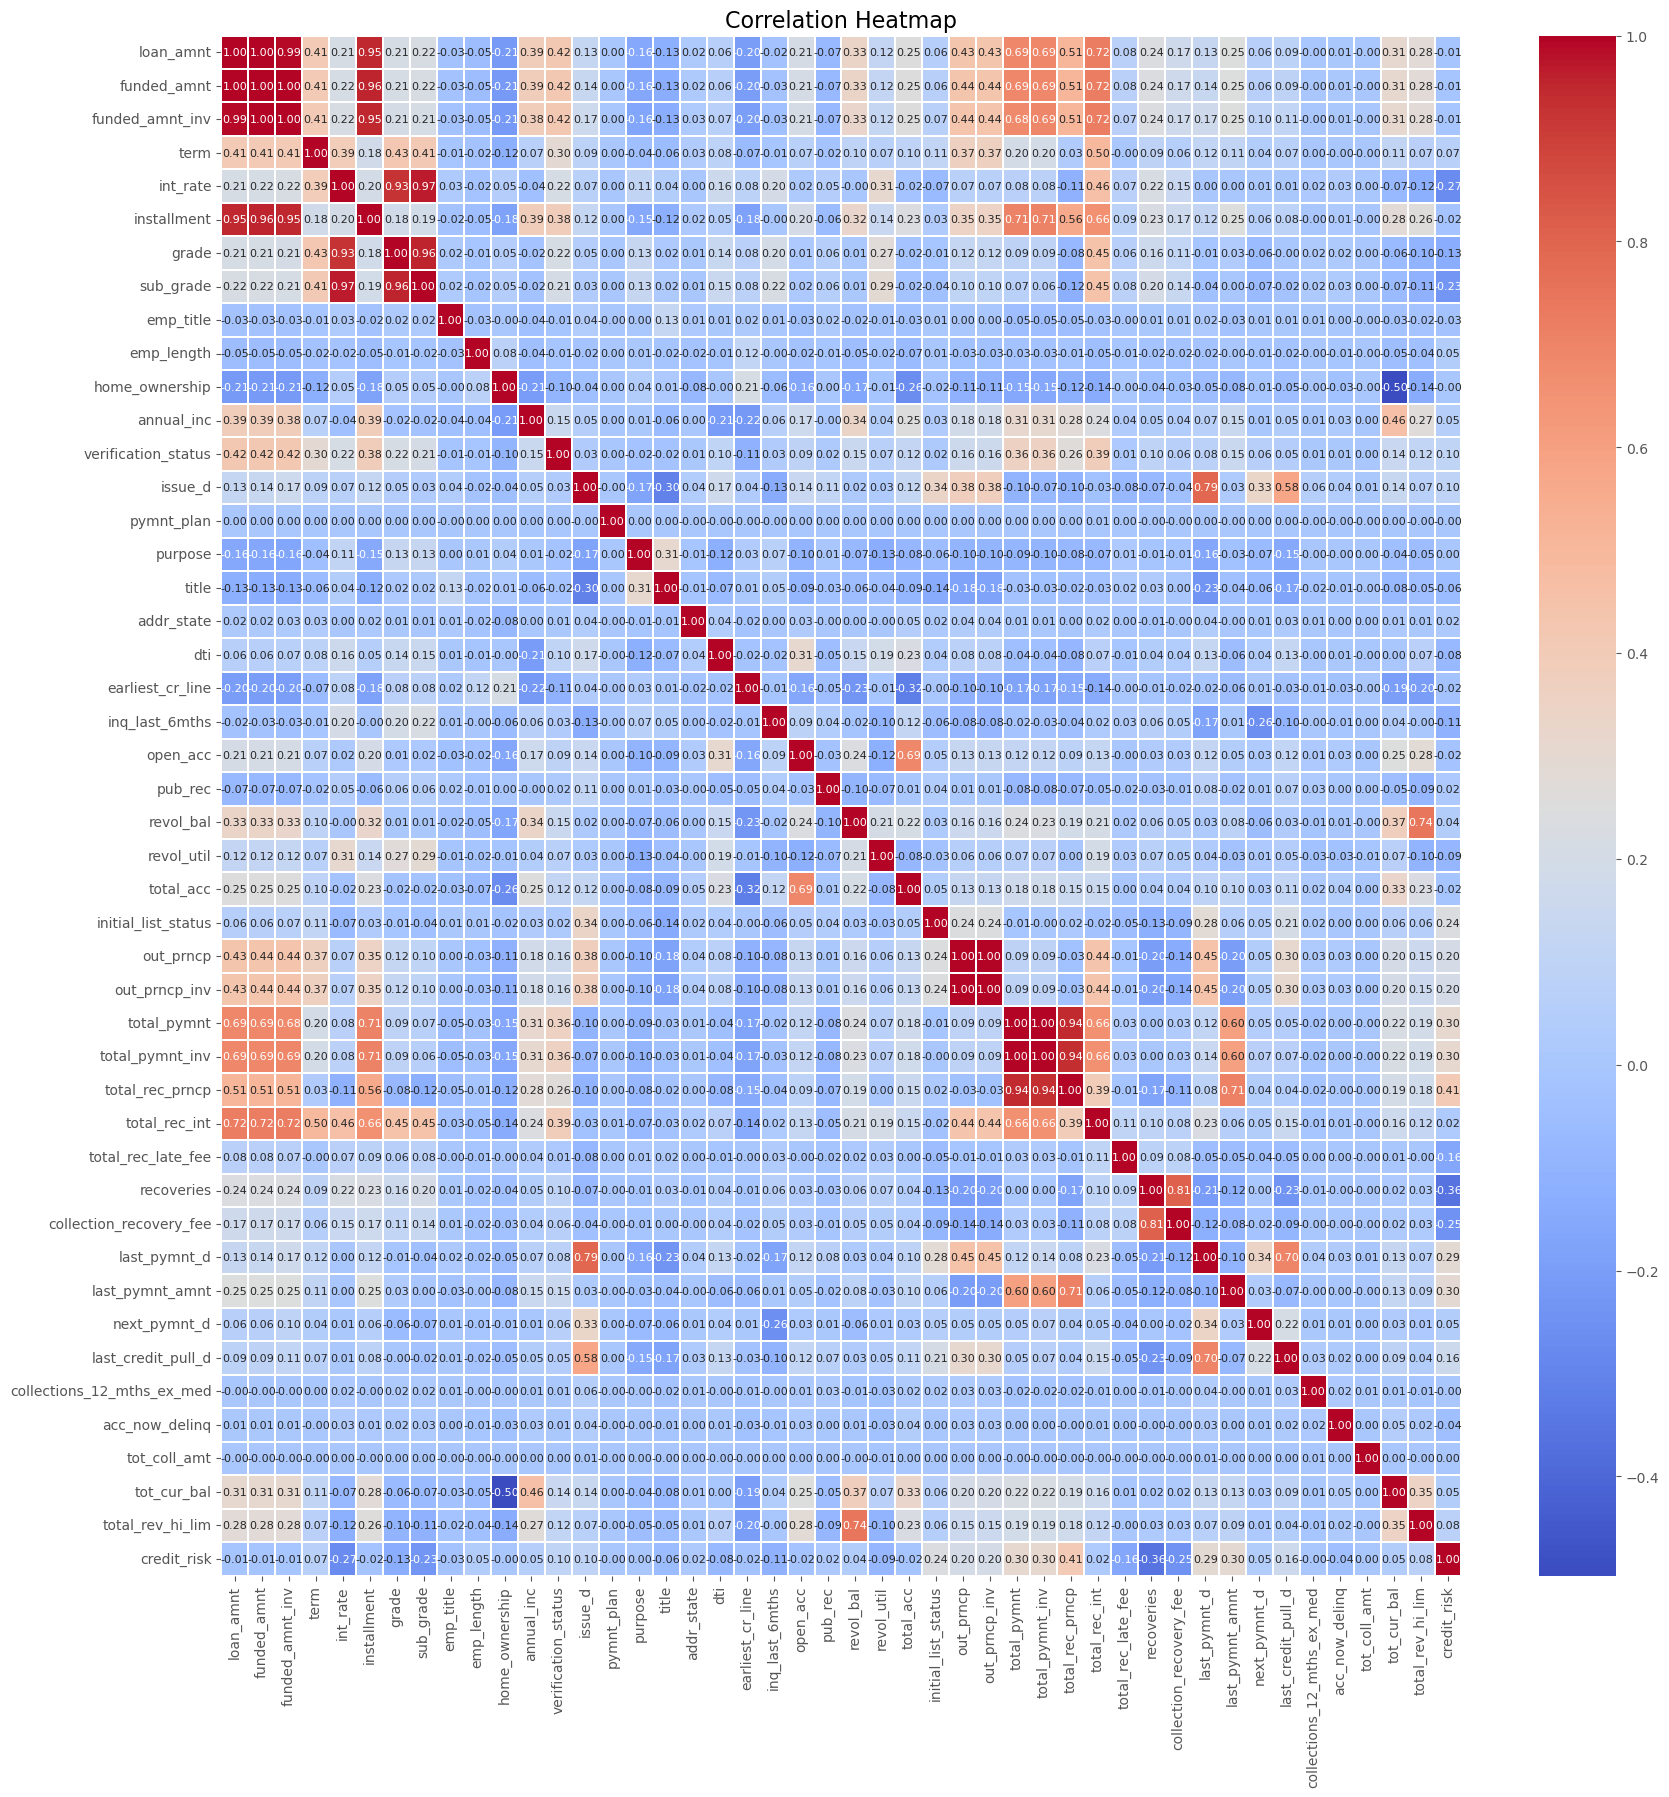

In [ ]:
credit_risk_train = pd.concat([X_train, y_train], axis=1)
corr = credit_risk_train.corr()

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.1, annot_kws={"size": 8})

# Reduce the font size of x and y axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()


Based on the correlation heatmap, there are features with a high correlation value > 0.8<br>
Apparently there are
1. loan_amnt and funded_amnt, loan_amnt and funded_amnt_inv, funded_amnt and funded_amnt_inv, installment and loan_amnt, installment and funded_amnt, installment and funded_amnt_inv, that are highly correlated.
Choose to maintain the installment because it is close to -1. Therefore, drop `loan_amnt, funded_amnt, and funded_amnt_inv`.

8. out_prncp_inv and out_prncp. Choose to maintain the out_prncp. Therefore, drop `out_prncp_inv`.

9. total_pymnt and total_pymnt_inv, total_pymnt and total_rec_prncp, total_pymnt_inv and total_rec_prncp. Choose to maintain the total_rec_prncp because it is close to -1. Therefore, drop `total_pymnt and total_pymnt_inv`.

12. collection_recovery_fee and recoveries. Choose to maintain the recoveries because it is close to -1. Therefore, drop `collection_recovery_fee`.

In [ ]:
X_train = X_train.drop(columns=['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                                'out_prncp_inv',
                                'total_pymnt_inv',
                                'total_pymnt',
                                'collection_recovery_fee'])
X_test = X_test.drop(columns=['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                                'out_prncp_inv',
                                'total_pymnt_inv',
                                'total_pymnt',
                                'collection_recovery_fee'])


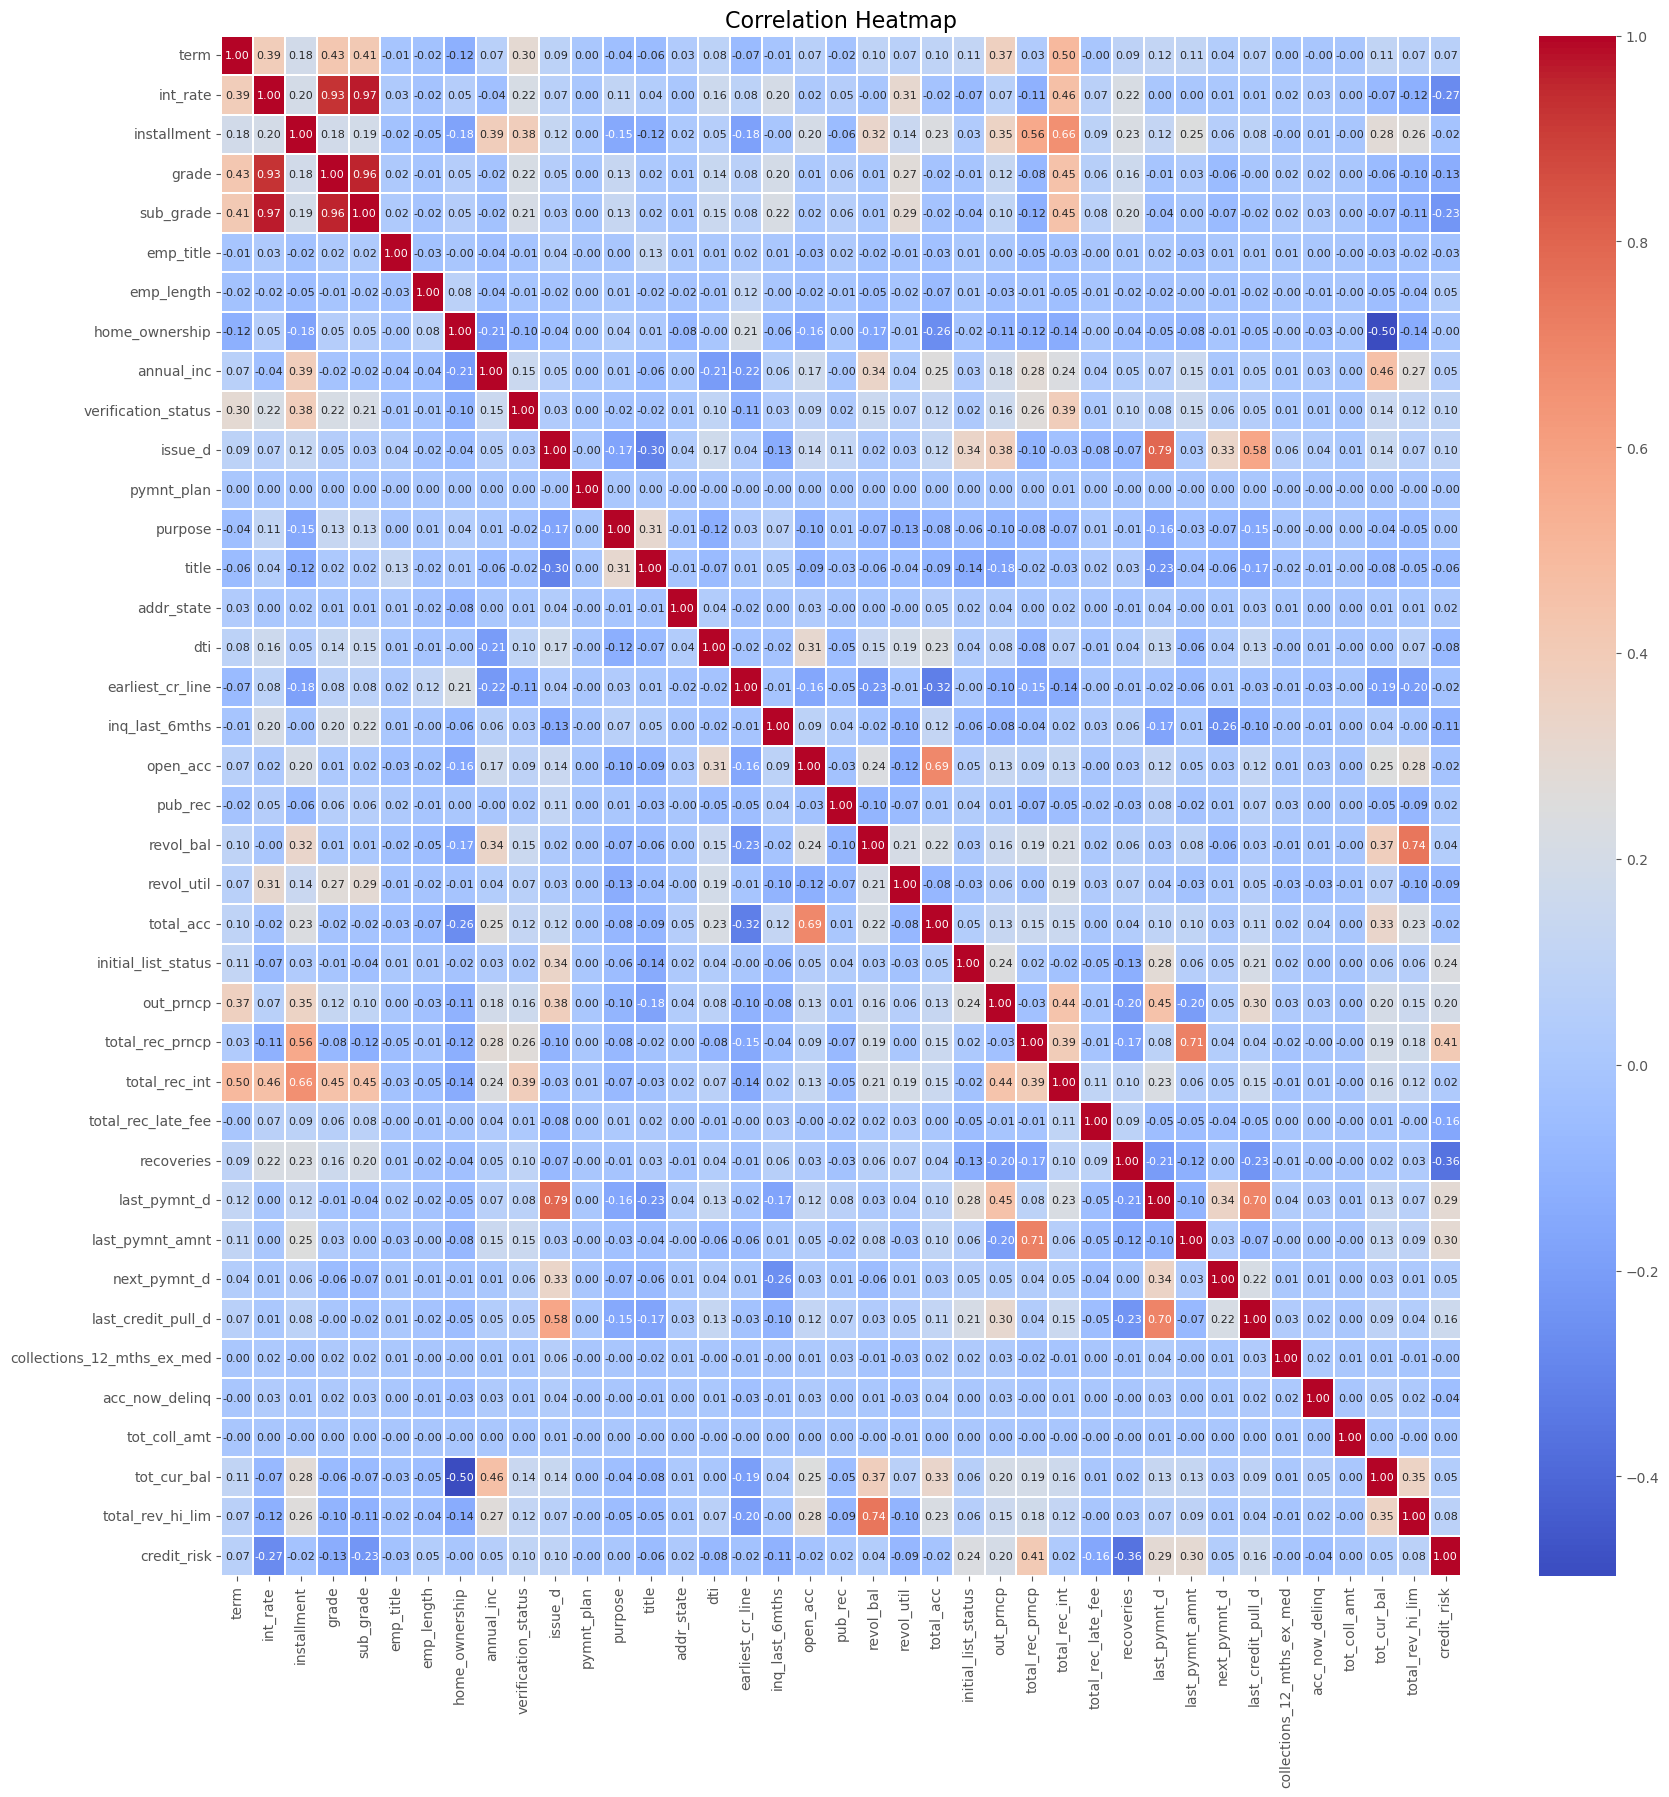

In [ ]:
credit_risk_train = pd.concat([X_train, y_train], axis=1)
corr = credit_risk_train.corr()

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.1, annot_kws={"size": 8})

# Reduce the font size of x and y axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Based on the correlation heatmap, there are features with a high correlation value > 0.8<br>
Apparently there are
- int_rate and grade, int_rate and sub_grade, grade and sub_grade, that are highly correlated.
Choose to maintain the sub_grade because it is close to -1. Therefore, drop `int_rate and grade`.

In [ ]:
X_train = X_train.drop(columns=['int_rate','grade'])
X_test = X_test.drop(columns=['int_rate','grade'])

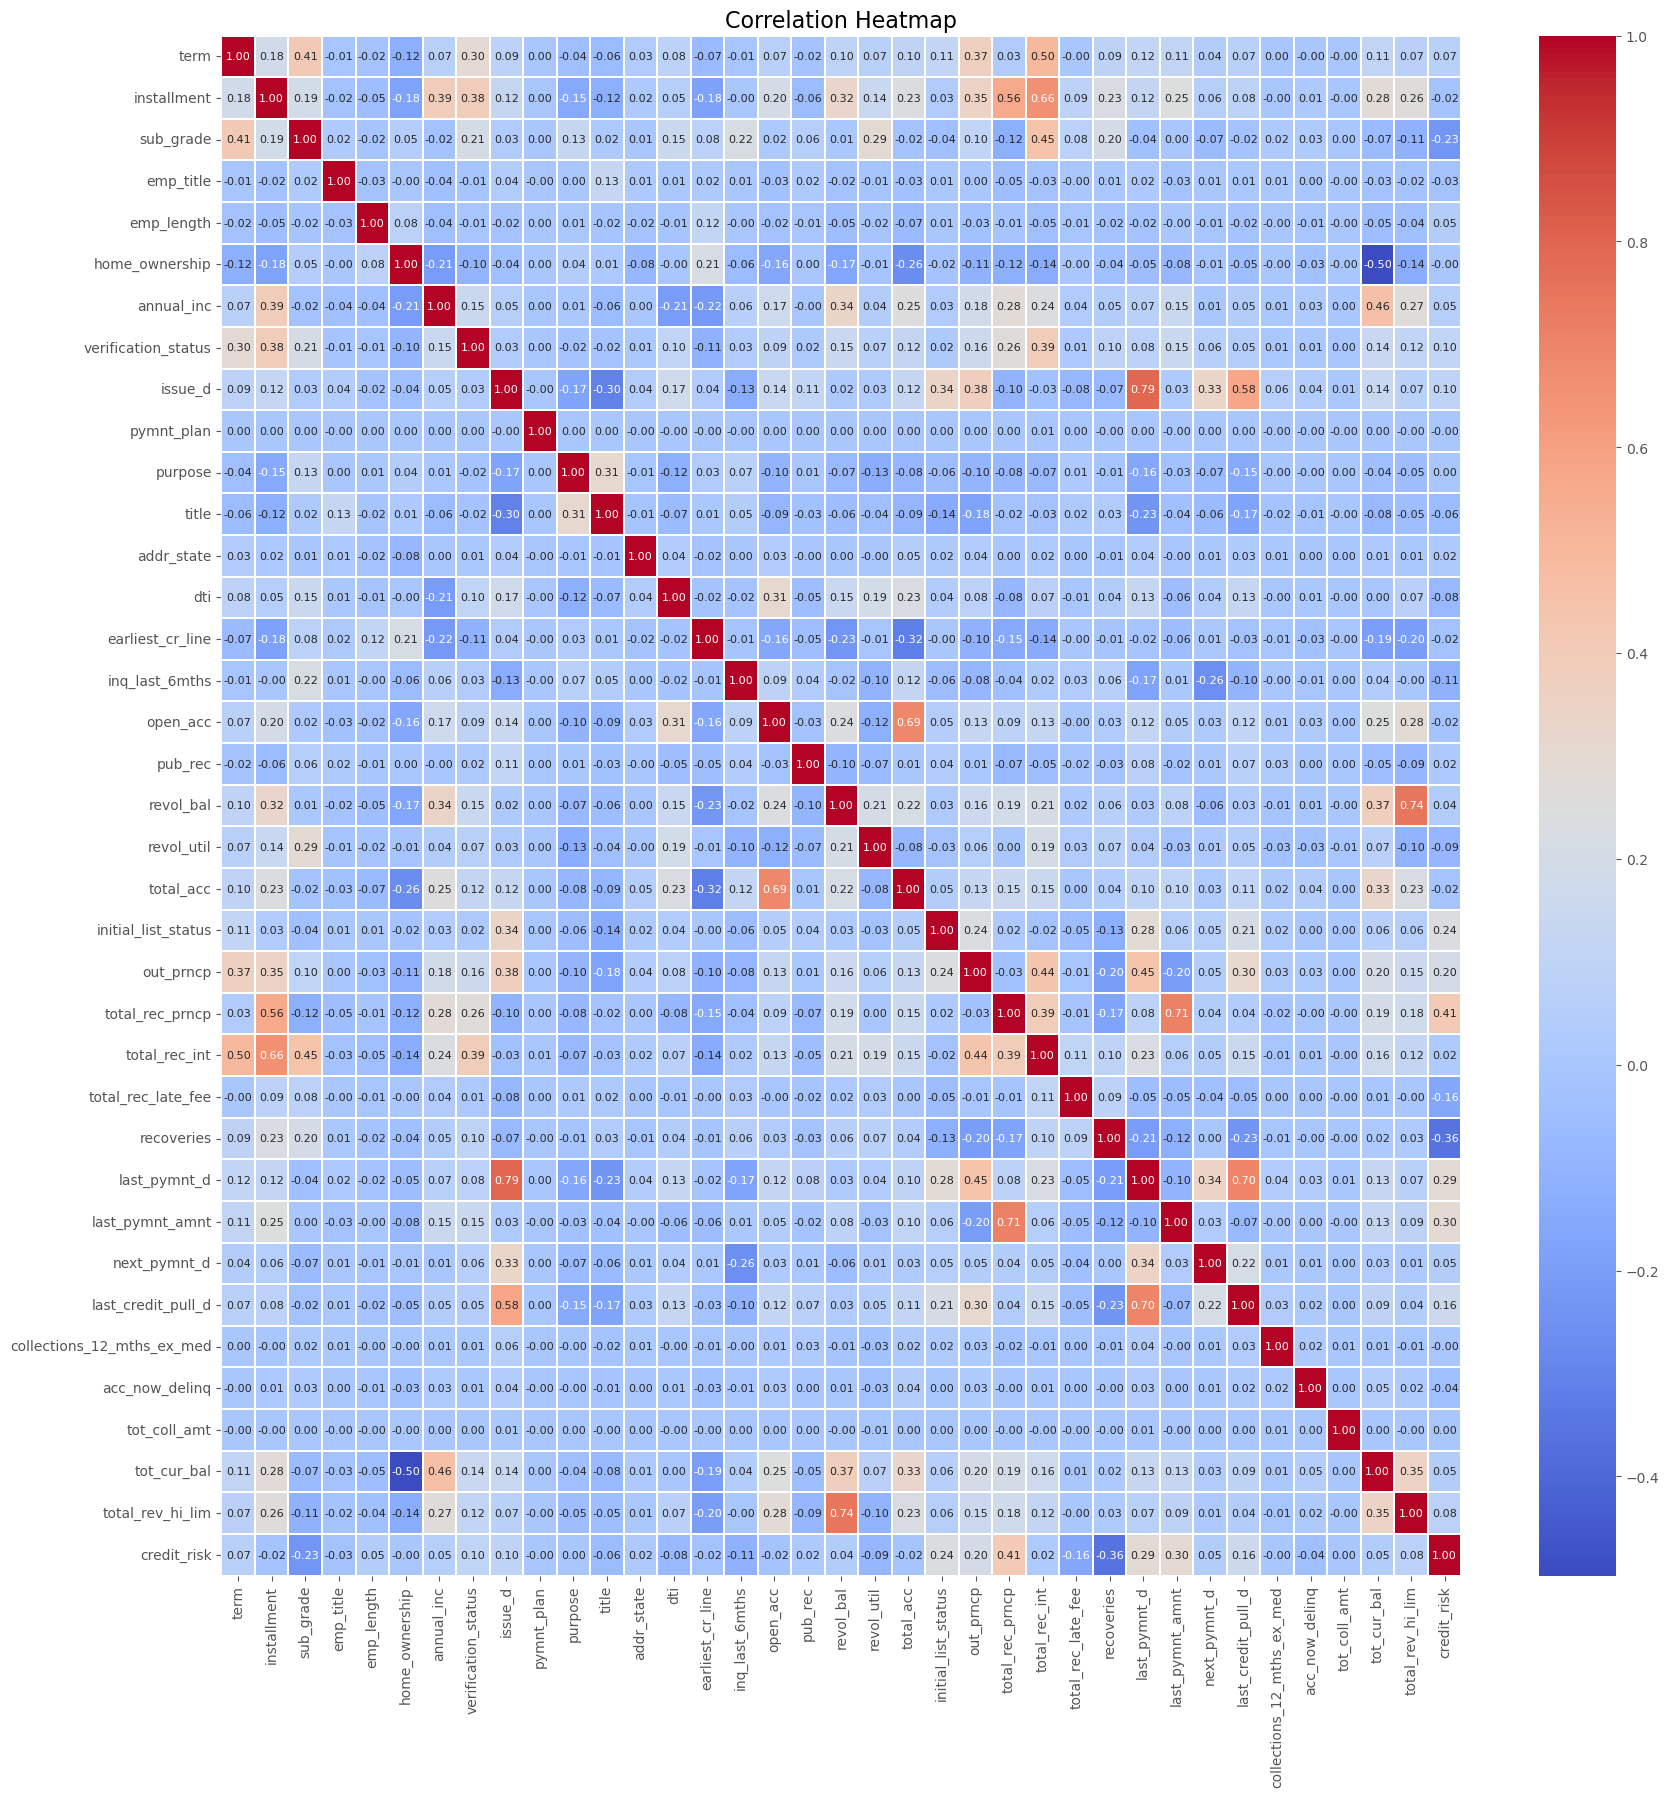

In [ ]:
credit_risk_train = pd.concat([X_train, y_train], axis=1)
corr = credit_risk_train.corr()

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.1, annot_kws={"size": 8})

# Reduce the font size of x and y axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Okayy, sudah aman. ready to go

##Standardrization

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

#Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# evaluation metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]

    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    f1_score = round((2* (precision * recall)/(precision + recall)))

    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

##Logistic Regression

In [ ]:
lr = LogisticRegression(solver='sag')
lr.fit(X_train, y_train)

LogisticRegression(solver='sag')

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [ ]:
classification_eval(y_train, y_train_pred, 'Logistic Regression Training')

Evaluation Model: Logistic Regression Training
[[237985  66525]
 [ 68670 236154]]
Accuracy   : 77.81 %
Precision  : 78.02 %
Recall     : 77.47 %
F1_Score   : 78 %


In [ ]:
classification_eval(y_test, y_test_pred, 'Logistic Regression Testing')

Evaluation Model: Logistic Regression Testing
[[59742 16582]
 [17156 58854]]
Accuracy   : 77.85 %
Precision  : 78.02 %
Recall     : 77.43 %
F1_Score   : 78 %


Nilai Logreg bisa lebih kecil dari yang lain karena data yang digunakan terdapat outlier.

- Logistic Regression cenderung sensitif terhadap outlier karena didasarkan pada fungsi log-odds. Outlier dapat memiliki pengaruh besar terhadap hasil model. Model seperti Decision Tree atau Random Forest mungkin lebih tahan terhadap efek outlier karena membangun keputusan berdasarkan pembagian ruang fitur.

##Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=7)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[271890  32620]
 [  3145 301679]]
Accuracy   : 94.13 %
Precision  : 90.24 %
Recall     : 98.97 %
F1_Score   : 94 %


In [ ]:
classification_eval(y_test, y_test_pred, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[68212  8112]
 [  808 75202]]
Accuracy   : 94.14 %
Precision  : 90.26 %
Recall     : 98.94 %
F1_Score   : 94 %


##Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[273721  30789]
 [  5719 299105]]
Accuracy   : 94.01 %
Precision  : 90.67 %
Recall     : 98.12 %
F1_Score   : 94 %


In [ ]:
classification_eval(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[68712  7612]
 [ 1503 74507]]
Accuracy   : 94.02 %
Precision  : 90.73 %
Recall     : 98.02 %
F1_Score   : 94 %


##KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [ ]:
classification_eval(y_train, y_train_pred, 'KNN Training')

Evaluation Model: KNN Training
[[301850   2660]
 [ 24635 280189]]
Accuracy   : 95.52 %
Precision  : 99.06 %
Recall     : 91.92 %
F1_Score   : 95 %


In [ ]:
classification_eval(y_test, y_test_pred, 'KNN Testing')

Evaluation Model: KNN Testing
[[74216  2108]
 [12007 64003]]
Accuracy   : 90.73 %
Precision  : 96.81 %
Recall     : 84.2 %
F1_Score   : 90 %


#Conclusion

Berdasarkan beberapa model di atas, akan dilihat berdasarkan accuracy karena modeling yang digunakan merupakan klasifikasidan data sudah balance. Maka dapat disimpulkan bahwa berdasarkan data loan untuk memprediksi credit risk customer, model `Random Forest akan lebih paham/lebih baik dalam mempresiksi credit risk customer`.

berdasarkan metriks evaluasi random forest:
- precision pada data train adalah 90.24%, artinya dari 100 data yang diprediksi 1 atau Good, ada 90 data yang diantaranya benar-benar good.
- recall pada data test adalah 98.94%, artinya dari 100% data yang 1 atau good, model bisa mendeteksi sebanyak 98% data.